In [1]:
%reset

Nothing done.


In [2]:
import sys
print(sys.executable)

/oak/stanford/groups/engreitz/Users/tri/envs/sceptre_env/bin/python


In [3]:
import scanpy as sc
import muon as mu
import pandas as pd
import numpy as np

Matplotlib is building the font cache; this may take a moment.
/oak/stanford/groups/engreitz/Users/tri/envs/sceptre_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/oak/stanford/groups/engreitz/Users/tri/envs/sceptre_env/lib/python3.10/site-packages/muon/_core/preproc.py:31: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('scanpy')` instead
  if Version(scanpy.__version__) < Version("1.10"):


In [4]:
data_dir = "/oak/stanford/groups/engreitz/Users/opushkar/cc_perturb/2.preprocessing_tonys_pipeline/2.normalized_data/normalized_data"
working_dir = "/oak/stanford/groups/engreitz/Users/tri/CodeBase/programDE/notebooks"


### Test

In [6]:
d0_mdata = mu.read(f"{data_dir}/d0_normalized_gex_and_guide.h5mu")

/oak/stanford/groups/engreitz/Users/tri/envs/sceptre_env/lib/python3.10/site-packages/mudata/_core/mudata.py:1598: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/oak/stanford/groups/engreitz/Users/tri/envs/sceptre_env/lib/python3.10/site-packages/mudata/_core/mudata.py:1461: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


In [7]:
d0_mdata

MuData object with n_obs × n_vars = 38609 × 18318
  2 modalities
    GEX:	38609 x 16392
      obs:	'guides_per_cell', 'guide_umi_counts', 'pct_counts_ribo', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'pool', 'sample_id', 'round1', 'well', 'biological_sample', 'plate', 'bci', 'stype', 'day', 'cell_pool', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'log1p_total_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'S_score', 'G2M_score', 'phase', 'outlier', 'size_factors', 'leiden_res_0.1', 'leiden_res_0.2', 'leiden_res_0.3', 'leiden_res_0.4', 'leiden_res_0.5', 'leiden_res_0.6', 'leiden_res_0.7', 'leiden_res_0.8', 'leiden_res_0.9', 'leiden_res_1.0'
      var:	'gene_id', 'symbol', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'n_counts', 'highly_deviant', 'highly_deviant_2k', 'binomial_deviance', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'orig_highly_variable', 'highly_variable_2k'
      uns:	'hvg', 'leiden_res_0.1', 'leiden_res_0.2', 'leiden_res_0.3', 'leiden_res_0.4', 'leiden_res_0.5', 'leiden_res_0.6', 'leiden_res_0.7', 'leiden_res_0.8', 'leiden_res_0.9', 'leiden_res_1.0', 'neighbors', 'pca', 'umap'
      obsm:	'X_pca', 'X_umap', 'guide_assignment', 'guide_counts'
      varm:	'PCs'
      layers:	'ambiguous', 'analytic_pearson_residuals', 'log1p_norm', 'mature', 'nascent', 'raw_counts', 'scran_normalization'
      obsp:	'connectivities', 'distances'
    guide:	38609 x 1926
      obs:	'bci', 'stype', 'well', 'day', 'cell_pool'

In [8]:
d0_mdata['GEX']

AnnData object with n_obs × n_vars = 38609 × 16392
    obs: 'guides_per_cell', 'guide_umi_counts', 'pct_counts_ribo', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'pool', 'sample_id', 'round1', 'well', 'biological_sample', 'plate', 'bci', 'stype', 'day', 'cell_pool', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'log1p_total_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'S_score', 'G2M_score', 'phase', 'outlier', 'size_factors', 'leiden_res_0.1', 'leiden_res_0.2', 'leiden_res_0.3', 'leiden_res_0.4', 'leiden_res_0.5', 'leiden_res_0.6', 'leiden_res_0.7', 'leiden_res_0.8', 'leiden_res_0.9', 'leiden_res_1.0'
    var: 'gene_id', 'symbol', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'n_counts', 'highly_deviant', 'highly_deviant

In [9]:
d0_mdata['GEX'].layers["raw_counts"]

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 65423017 stored elements and shape (38609, 16392)>

In [10]:
d0_mdata['GEX'].var_names

Index(['ENSG00000227232.5', 'ENSG00000238009.6', 'ENSG00000241860.7',
       'ENSG00000279457.4', 'ENSG00000228463.10', 'ENSG00000290385.1',
       'ENSG00000230021.10', 'ENSG00000225972.1', 'ENSG00000225630.1',
       'ENSG00000237973.1',
       ...
       'ENSG00000210196.2', 'ENSG00000271254.7', 'ENSG00000276345.1',
       'ENSG00000276700.1', 'ENSG00000275757.1', 'ENSG00000277196.4',
       'ENSG00000276256.1', 'ENSG00000273748.1', 'ENSG00000274917.1',
       'ENSG00000273730.1'],
      dtype='object', name='gene_id', length=16392)

In [11]:
d0_mdata['guide'].var_names

Index(['ACAA1_+_38178488.23-P1P2', 'ACAA1_+_38178517.23-P1P2',
       'ACAA1_+_38178559.23-P1P2', 'ACAA1_+_38178570.23-P1P2',
       'ACAA1_+_38178620.23-P1P2', 'ACAA1_-_38178575.23-P1P2',
       'ACTL7B_+_111618040.23-P1P2', 'ACTL7B_+_111618198.23-P1P2',
       'ACTL7B_+_111618251.23-P1P2', 'ACTL7B_-_111617995.23-P1P2',
       ...
       'SAFE_TARGETING_933', 'SAFE_TARGETING_986', 'WDR61_SGTN_13',
       'WDR61_SGTN_14', 'SUZ12_SGTN_22', 'SUZ12_SGTN_23', 'MESDC1_SGTN_11',
       'MESDC1_SGTN_12', 'TP53_SGTN_01', 'TP53_SGTN_02'],
      dtype='object', name='feature_id', length=1926)

In [12]:
d0_mdata['guide']

AnnData object with n_obs × n_vars = 38609 × 1926
    obs: 'bci', 'stype', 'well', 'day', 'cell_pool'

In [13]:
d0_mdata['guide'].obs["stype"]

barcode
CCTAATCCAACAACCATCTATTAC_2    T
GGTGCGAACCTCCTGAATCCGCGA_2    T
AACTCACCATCATTCCCTGTCCCG_1    T
TTCACGCACACTTCGAATTCATGG_2    T
GTCTGTCAGAGCTGAACCGTTCTA_3    T
                             ..
CGAACTTAGAGTTAGCATTCATGG_3    T
CCGTGAGAGAATCTGAATCGCATA_3    T
TGAAGAGACCTCTATCTCTATTAC_3    T
CCATCCTCGAGCTGAAAAACGATA_2    T
TCCGTCTAAACCGAGACGTTCGAG_2    T
Name: stype, Length: 38609, dtype: category
Categories (1, object): ['T']

In [14]:
d0_mdata['GEX'].var['symbol']

gene_id
ENSG00000227232.5              WASH7P
ENSG00000238009.6     ENSG00000238009
ENSG00000241860.7     ENSG00000241860
ENSG00000279457.4              WASH9P
ENSG00000228463.10    ENSG00000228463
                           ...       
ENSG00000277196.4               PRODH
ENSG00000276256.1     ENSG00000276256
ENSG00000273748.1     ENSG00000273748
ENSG00000274917.1           RNA5-8SN5
ENSG00000273730.1           5_8S_rRNA
Name: symbol, Length: 16392, dtype: category
Categories (16338, object): ['5_8S_rRNA', '7SK', 'A1BG', 'A1BG-AS1', ..., 'ZYG11B', 'ZYX', 'ZZEF1', 'ZZZ3']

In [15]:
guide_meta_df = pd.read_csv(f"{working_dir}/300genes_guide_metadata_v43.tsv", sep='\t')

In [16]:
guide_meta_df

,guide_id,spacer,targeting,type,guide_chr,guide_start,guide_end,strand,pam,genomic_element,intended_target_name,ensembl_id,intended_target_chr,intended_target_start,intended_target_end,putative_target_genes,reporter,imperfect
0,ACAA1_+_38178488.23-P1P2,TAGTGCTGGGCCACCTGAG,True,targeting,chr3,38137000.0,38137019.0,-,NGG,promoter,ACAA1,ENSG00000060971,chr3,38103129.0,38137242.0,ACAA1,NaN,NaN
1,ACAA1_+_38178517.23-P1P2,GTTGACCTGCGCAATGCAG,True,targeting,chr3,38137029.0,38137048.0,-,NGG,promoter,ACAA1,ENSG00000060971,chr3,38103129.0,38137242.0,ACAA1,NaN,NaN
2,ACAA1_+_38178559.23-P1P2,TAACTCCGCGGTCAGTTCC,True,targeting,chr3,38137071.0,38137090.0,-,NGG,promoter,ACAA1,ENSG00000060971,chr3,38103129.0,38137242.0,ACAA1,NaN,NaN
3,ACAA1_+_38178570.23-P1P2,CGGCTGTCTGTTAACTCCG,True,targeting,chr3,38137082.0,38137101.0,-,NGG,promoter,ACAA1,ENSG00000060971,chr3,38103129.0,38137242.0,ACAA1,NaN,NaN
4,ACAA1_+_38178620.23-P1P2,GGCGGAGTTGAGGCCTTGG,True,targeting,chr3,38137132.0,38137151.0,-,NGG,promoter,ACAA1,ENSG00000060971,chr3,38103129.0,38137242.0,ACAA1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921,SUZ12_SGTN_23,TTGCAGGCGCTTGCTCTCCG,True,targeting,chr17,31937180.0,31937203.0,+,NGG,promoter,SUZ12,ENSG00000178691,chr17,31937007.0,32001038.0,SUZ12,NaN,NaN
1922,MESDC1_SGTN_11,AGAAACTGAAAGGAAGGGCG,True,targeting,chr15,81001111.0,81001134.0,-,NGG,promoter,TLNRD1,ENSG00000140406,chr15,81000923.0,81005788.0,TLNRD1,NaN,NaN
1923,MESDC1_SGTN_12,CCGCGCGCGGAGAGGAAGC,True,targeting,chr15,81001066.0,81001088.0,+,NGG,promoter,TLNRD1,ENSG00000140406,chr15,81000923.0,81005788.0,TLNRD1,NaN,NaN
1924,TP53_SGTN_01,GGACACTTTGCGTTCGGGC,True,targeting,chr17,7687417.0,7687439.0,-,NGG,promoter,TP53,ENSG00000141510,chr17,7661779.0,7687538.0,TP53,NaN,NaN


In [17]:
import scipy.io as sio
import pandas as pd
import os

### Day 0 

In [18]:
mdata = d0_mdata

# Filter out cells that have no guides
#mdata = mdata[mdata['GEX'].obs['guides_per_cell'] > 0]

In [19]:
# Define a temporary folder for transfer
temp_dir = working_dir + "/d0_sceptre_transfer"
os.makedirs(temp_dir, exist_ok=True)

# 1. EXTRACT MATRICES (Transpose them!)
# Scanpy is (Cells × Genes), Sceptre needs (Genes × Cells)
print("Writing sparse matrices...")
sio.mmwrite(f"{temp_dir}/response_matrix.mtx", mdata['GEX'].layers['raw_counts'].T)
sio.mmwrite(f"{temp_dir}/grna_matrix.mtx", mdata['guide'].X.T)

# 2. EXTRACT NAMES (Row/Col names are lost in .mtx)
# Save Gene names and Guide names to assign them later in R
pd.Series(mdata['GEX'].var_names).to_csv(f"{temp_dir}/gene_names.csv", index=False, header=False)
pd.Series(mdata['guide'].var_names).to_csv(f"{temp_dir}/guide_names.csv", index=False, header=False)
pd.Series(mdata['GEX'].obs_names).to_csv(f"{temp_dir}/cell_names.csv", index=False, header=False)

Writing sparse matrices...


In [20]:
mdata['GEX']

AnnData object with n_obs × n_vars = 38609 × 16392
    obs: 'guides_per_cell', 'guide_umi_counts', 'pct_counts_ribo', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'pool', 'sample_id', 'round1', 'well', 'biological_sample', 'plate', 'bci', 'stype', 'day', 'cell_pool', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'log1p_total_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'S_score', 'G2M_score', 'phase', 'outlier', 'size_factors', 'leiden_res_0.1', 'leiden_res_0.2', 'leiden_res_0.3', 'leiden_res_0.4', 'leiden_res_0.5', 'leiden_res_0.6', 'leiden_res_0.7', 'leiden_res_0.8', 'leiden_res_0.9', 'leiden_res_1.0'
    var: 'gene_id', 'symbol', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'n_counts', 'highly_deviant', 'highly_deviant

In [21]:
# 3. EXTRACT COVARIATES 
rna = mdata['GEX']
covariates_df = pd.DataFrame({
    "batch": rna.obs['sample_id'],
    "grna_n_nonzero": rna.obs['guides_per_cell'],
    "grna_n_umis": rna.obs['guide_umi_counts'],
    "response_n_nonzero": rna.obs['n_genes_by_counts'],
    "response_n_umis": rna.obs['total_counts'],
    "response_p_mito": rna.obs['pct_counts_mt'],
})
covariates_df.to_csv(f"{temp_dir}/covariates.csv")
covariates_df

,batch,grna_n_nonzero,grna_n_umis,response_n_nonzero,response_n_umis,response_p_mito
barcode,,,,,,
CCTAATCCAACAACCATCTATTAC_2,300genes:eTN5_GEX_sub2,5,195.0,2049,3969.242920,14.708926
GGTGCGAACCTCCTGAATCCGCGA_2,300genes:eTN5_GEX_sub2,5,176.0,2232,3808.424805,10.594932
AACTCACCATCATTCCCTGTCCCG_1,300genes:eTN5_GEX_sub1,4,183.0,1656,3441.276367,9.923644
TTCACGCACACTTCGAATTCATGG_2,300genes:eTN5_GEX_sub2,0,3.0,688,805.500061,1.738051
GTCTGTCAGAGCTGAACCGTTCTA_3,300genes:eTN5_GEX_sub3,3,46.0,2623,5361.565430,12.086022
...,...,...,...,...,...,...
CGAACTTAGAGTTAGCATTCATGG_3,300genes:eTN5_GEX_sub3,12,233.0,1729,4035.552734,10.494226
CCGTGAGAGAATCTGAATCGCATA_3,300genes:eTN5_GEX_sub3,2,57.0,1205,1955.549194,13.985841
TGAAGAGACCTCTATCTCTATTAC_3,300genes:eTN5_GEX_sub3,7,344.0,2099,3987.371338,9.166440


In [22]:
# 4. PREPARE GUIDE MAPPING 
# Sceptre needs a table mapping 'grna_id' to 'grna_target'.

# 1. Create a "skeleton" DataFrame from the actual matrix order
# This ensures the order matches mdata['guide'].X perfectly
# We name the index 'grna_id' to match Sceptre's expectation immediately
guide_mapping = pd.DataFrame(index=mdata['guide'].var_names)
guide_mapping.index.name = 'grna_id'

# 2. Prepare metadata for merging
# Ensure 'guide_id' is the index so we can map efficiently
lookup_df = guide_meta_df.set_index('guide_id')

# 3. Map the targets onto the skeleton
# We use .loc[] to pull the specific target for each guide in the exact order required
guide_mapping['grna_target'] = lookup_df.loc[guide_mapping.index, 'intended_target_name']

# 4. Reset index so 'grna_id' becomes a column (Sceptre requires this)
guide_mapping = guide_mapping.reset_index()

# ==========================================
# VALIDATION CHECKS 
# ==========================================

# Check 1: Are there any NAs? (Guides in mdata that were missing from meta_df)
na_count = guide_mapping['grna_target'].isna().sum()
if na_count > 0:
    print(f"⚠️ WARNING: {na_count} guides have NaN targets! These will crash Sceptre.")
else:
    print("✅ All guides mapped successfully.")

# Check 2: Verify the first few rows manually
print("\nFirst 5 rows of mapping (Must match mdata['guide'].var_names order):")
print(guide_mapping.head())

# 5. Save for Sceptre
guide_mapping.to_csv(f"{temp_dir}/guide_mapping.csv", index=False)

✅ All guides mapped successfully.

First 5 rows of mapping (Must match mdata['guide'].var_names order):
                    grna_id grna_target
0  ACAA1_+_38178488.23-P1P2       ACAA1
1  ACAA1_+_38178517.23-P1P2       ACAA1
2  ACAA1_+_38178559.23-P1P2       ACAA1
3  ACAA1_+_38178570.23-P1P2       ACAA1
4  ACAA1_+_38178620.23-P1P2       ACAA1


In [23]:
guide_mapping

,grna_id,grna_target
0,ACAA1_+_38178488.23-P1P2,ACAA1
1,ACAA1_+_38178517.23-P1P2,ACAA1
2,ACAA1_+_38178559.23-P1P2,ACAA1
3,ACAA1_+_38178570.23-P1P2,ACAA1
4,ACAA1_+_38178620.23-P1P2,ACAA1
...,...,...
1921,SUZ12_SGTN_23,SUZ12
1922,MESDC1_SGTN_11,TLNRD1
1923,MESDC1_SGTN_12,TLNRD1
1924,TP53_SGTN_01,TP53


In [24]:
# Create a mapping from the Gene Symbol (which matches your guides)
# to the Gene Index (which matches the matrix rownames)

# Check which column in mdata['GEX'].var holds the symbol
symbol_col = 'symbol' 

gene_map = mdata['GEX'].var[[symbol_col]].reset_index()
gene_map.columns = ['response_id', 'grna_target'] # Rename for easy merging in R

# Save it
gene_map.to_csv(f"{temp_dir}/gene_symbol_map.csv", index=False)
print("✅ Gene mapping saved.")

✅ Gene mapping saved.


In [25]:
gene_map

,response_id,grna_target
0,ENSG00000227232.5,WASH7P
1,ENSG00000238009.6,ENSG00000238009
2,ENSG00000241860.7,ENSG00000241860
3,ENSG00000279457.4,WASH9P
4,ENSG00000228463.10,ENSG00000228463
...,...,...
16387,ENSG00000277196.4,PRODH
16388,ENSG00000276256.1,ENSG00000276256
16389,ENSG00000273748.1,ENSG00000273748
16390,ENSG00000274917.1,RNA5-8SN5


#### Import data to SCEPTRE (Rcell)

In [26]:
%load_ext rpy2.ipython

In [27]:
%%R
library(sceptre)
library(Matrix)

# Define path
data_dir <- "/oak/stanford/groups/engreitz/Users/tri/CodeBase/programDE/notebooks/d0_sceptre_transfer"

# 1. LOAD MATRICES
cat("Loading matrices into R...\n")
response_mat <- readMM(file.path(data_dir, "response_matrix.mtx"))
grna_mat <- readMM(file.path(data_dir, "grna_matrix.mtx"))

# 2. ATTACH NAMES
gene_names <- read.csv(file.path(data_dir, "gene_names.csv"), header=FALSE)$V1
guide_names <- read.csv(file.path(data_dir, "guide_names.csv"), header=FALSE)$V1
cell_names <- read.csv(file.path(data_dir, "cell_names.csv"), header=FALSE)$V1

rownames(response_mat) <- gene_names
colnames(response_mat) <- cell_names

rownames(grna_mat) <- guide_names
colnames(grna_mat) <- cell_names

Loading matrices into R...


In [28]:
%%R

# 3. LOAD METADATA
covariates <- read.csv(file.path(data_dir, "covariates.csv"), row.names=1)
guide_mapping <- read.csv(file.path(data_dir, "guide_mapping.csv"))

# ==============================================================================
# FIX: RENAME 'response_p_mito' SO WE KEEP IT
# Sceptre blocks the name 'response_p_mito' but doesn't calculate it.
# We rename it to 'mt_percent' so we can use it as a covariate later.
# ==============================================================================

# 1. Rename response_p_mito if it exists
if ("response_p_mito" %in% colnames(covariates)) {
    cat("Renaming 'response_p_mito' to 'mt_percent'...\n")
    names(covariates)[names(covariates) == "response_p_mito"] <- "mt_percent"
}

# 2. DROP OTHER RESERVED COLUMNS (which Sceptre DOES calculate)
# We still drop n_umis and n_nonzero because Sceptre re-calculates those automatically.
reserved_cols <- c("response_n_nonzero", "response_n_umis", "grna_n_nonzero", "grna_n_umis")
covariates <- covariates[, !(colnames(covariates) %in% reserved_cols), drop=FALSE]

# 4. CREATE SCEPTRE OBJECT
sceptre_object <- import_data(
  response_matrix = response_mat,
  grna_matrix = grna_mat,
  grna_target_data_frame = guide_mapping,
  extra_covariates = covariates,
  moi = "high"
)

print("✅ Sceptre object created!")
print(head(sceptre_object@covariate_data_frame))

Renaming 'response_p_mito' to 'mt_percent'...
[1] "\u2705 Sceptre object created!"
                           response_n_nonzero response_n_umis grna_n_nonzero
CCTAATCCAACAACCATCTATTAC_2               1774        3969.243             13
GGTGCGAACCTCCTGAATCCGCGA_2               1785        3808.425             23
AACTCACCATCATTCCCTGTCCCG_1               1439        3441.277             38
TTCACGCACACTTCGAATTCATGG_2                598         805.500              3
GTCTGTCAGAGCTGAACCGTTCTA_3               2308        5361.566             10
CTGGCATAAACCGAGATGTCTGAA_3               1068        2485.453            137
                           grna_n_umis                  batch mt_percent
CCTAATCCAACAACCATCTATTAC_2         195 300genes:eTN5_GEX_sub2  14.708926
GGTGCGAACCTCCTGAATCCGCGA_2         176 300genes:eTN5_GEX_sub2  10.594932
AACTCACCATCATTCCCTGTCCCG_1         183 300genes:eTN5_GEX_sub1   9.923644
TTCACGCACACTTCGAATTCATGG_2           3 300genes:eTN5_GEX_sub2   1.738051
GTCTGTCAGAGCT

In [29]:
%%R
# 1. Load the translation map
gene_map <- read.csv(file.path(data_dir, "gene_symbol_map.csv"))

# 2. Start with guide mapping (which has 'grna_target' as Symbol)
discovery_pairs_highmoi <- guide_mapping

# 3. Merge to attach the correct response_id (Gene ID)
#    This matches 'grna_target' in guides to 'grna_target' in the gene map
discovery_pairs_highmoi <- merge(discovery_pairs_highmoi, gene_map, by="grna_target")

# 4. Select ONLY the two columns Sceptre needs
#    (We filter out non-targeting guides automatically via the merge)
discovery_pairs_highmoi <- discovery_pairs_highmoi[, c("grna_target", "response_id")]

# 5. DEDUPLICATE
#    Sceptre performs analysis at the *Target* level, not the *Guide* level.
#    We only need one row per Target-Gene pair.
discovery_pairs_highmoi <- unique(discovery_pairs_highmoi)

print(paste("Unique pairs to test:", nrow(discovery_pairs_highmoi)))
print(head(discovery_pairs_highmoi))

[1] "Unique pairs to test: 281"
   grna_target        response_id
1        ACAA1 ENSG00000060971.19
7       ACVR1B ENSG00000135503.13
13      ACVR2A ENSG00000121989.15
19      ACVR2B ENSG00000114739.14
25       ADCY2 ENSG00000078295.17
31      AMOTL2 ENSG00000114019.15


In [30]:
%%R 

sceptre_object_highmoi <- set_analysis_parameters(
  sceptre_object = sceptre_object,
  discovery_pairs = discovery_pairs_highmoi,
  side = "both", control_group = "complement")

In [31]:
%%R

png(file.path(data_dir, "grna_count_distributions.png"), width = 3000, height = 2000, res = 300)

print(plot_grna_count_distributions(
  sceptre_object = sceptre_object_highmoi,
  n_grnas_to_plot = 8
))

dev.off()

message("✅ Saved PNG plot to: ", file.path(data_dir, "grna_count_distributions.png"))

✅ Saved PNG plot to: /oak/stanford/groups/engreitz/Users/tri/CodeBase/programDE/notebooks/d0_sceptre_transfer/grna_count_distributions.png


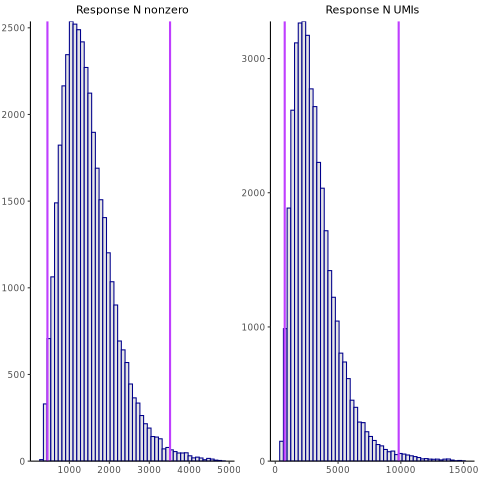

In [32]:
%%R

plot_covariates(sceptre_object_highmoi, p_mito_threshold = 0.25)

In [33]:
%%R
sceptre_object_highmoi <- assign_grnas(
  sceptre_object = sceptre_object_highmoi,
  method = "mixture",
  parallel = FALSE
)

Note: If you are on a Mac laptop or desktop, consider setting `parallel = TRUE` to improve speed. Otherwise, keep `parallel = FALSE`.

Performing gRNA-to-cell assignments for gRNA ACAA1_+_38178488.23-P1P2 (1 of 1926)
Performing gRNA-to-cell assignments for gRNA ACAA1_+_38178620.23-P1P2 (5 of 1926)
Performing gRNA-to-cell assignments for gRNA ACTL7B_-_111617995.23-P1P2 (10 of 1926)
Performing gRNA-to-cell assignments for gRNA ACVR1B_+_52345762.23-P1P2 (15 of 1926)
Performing gRNA-to-cell assignments for gRNA ACVR2A_+_148602343.23-P1P2 (20 of 1926)
Performing gRNA-to-cell assignments for gRNA ACVR2B_+_38495339.23-P1P2 (25 of 1926)
Performing gRNA-to-cell assignments for gRNA ACVR2B_-_38495819.23-P1P2 (30 of 1926)
Performing gRNA-to-cell assignments for gRNA ADCY2_-_7396429.23-P1P2 (35 of 1926)
Performing gRNA-to-cell assignments for gRNA AMOTL2_+_134093279.23-P1P2 (40 of 1926)
Performing gRNA-to-cell assignments for gRNA ANP32E_+_150208342.23-P1P2 (45 of 1926)
Performing gRNA-to-cell ass

Performing gRNA-to-cell assignments for gRNA CACNG1_+_65040756.23-P1P2 (160 of 1926)
Performing gRNA-to-cell assignments for gRNA CAPN5_+_76778225.23-P1P2 (165 of 1926)
Performing gRNA-to-cell assignments for gRNA CASP3_+_185570560.23-P1P2 (170 of 1926)
Performing gRNA-to-cell assignments for gRNA CBLL1_+_107384793.23-P1P2 (175 of 1926)
Performing gRNA-to-cell assignments for gRNA CBLL1_-_107384635.23-P1P2 (180 of 1926)
Performing gRNA-to-cell assignments for gRNA CCM2_-_45039941.23-P1P2 (185 of 1926)
Performing gRNA-to-cell assignments for gRNA CCNC_-_100016267.23-P1P2 (190 of 1926)
Performing gRNA-to-cell assignments for gRNA CCNT2_-_135676416.23-P1P2 (195 of 1926)
Performing gRNA-to-cell assignments for gRNA CCT6B_+_33288381.23-P1P2 (200 of 1926)
Performing gRNA-to-cell assignments for gRNA CD2BP2_+_30366413.23-P1P2 (205 of 1926)
Performing gRNA-to-cell assignments for gRNA CD2BP2_-_30366630.23-P1P2 (210 of 1926)
Performing gRNA-to-cell assignments for gRNA CD99L2_-_150067120.23-P1P

In [34]:
%%R
library(Matrix)

# 1. Get the assignment matrix
A <- get_grna_assignments(sceptre_object_highmoi)

# 2. Ensure it is a numeric sparse matrix (1/0)
if (inherits(A, "Matrix") || is.matrix(A)) {
    A_num <- if (inherits(A, "Matrix")) drop0(A * 1) else (A * 1)
} else {
    stop("Output is not a matrix.")
}

# --- FIX: ROBUST NAME RECOVERY ---
# We retrieve names using Sceptre's standard metadata accessors
# instead of touching internal slots like @grna_matrix.

# Try to get cell names from the matrix first
current_cell_names <- colnames(A_num)
current_guide_names <- rownames(A_num)

# If missing, grab them from the main object's covariate data frame
if (is.null(current_cell_names)) {
    message("⚠️ Matrix missing colnames. Fetching from sceptre_object...")
    # The covariate data frame ALWAYS has the cell IDs as rownames
    current_cell_names <- rownames(sceptre_object_highmoi@covariate_data_frame)
    
    # Safety check: lengths must match
    if (length(current_cell_names) != ncol(A_num)) {
        stop(paste("Mismatch! Matrix has", ncol(A_num), "cols but object has", length(current_cell_names), "cells."))
    }
    colnames(A_num) <- current_cell_names
}

# If guide names are missing, they should match the unique values in your guide mapping
if (is.null(current_guide_names)) {
    message("⚠️ Matrix missing rownames. Fetching from guide mapping...")
    # Get unique targets from the mapping table you loaded earlier
    # Note: This assumes the matrix rows are sorted/aligned to these unique targets.
    # In 'mixture' method, rows usually correspond to the 'grna_target' labels.
    
    # SAFE FALLBACK: If we can't be 100% sure of order, we warn the user.
    # But usually, they match the 'grna_target' column from your input.
    unique_targets <- sort(unique(guide_mapping$grna_target))
    
    if (length(unique_targets) == nrow(A_num)) {
         rownames(A_num) <- unique_targets
    } else {
         warning("Could not automatically align target names. Using generic IDs.")
         rownames(A_num) <- paste0("target_", seq_len(nrow(A_num)))
    }
}
# ---------------------------------

# 3. Convert to Long Format
s <- summary(A_num)
assign_long <- data.frame(
    cell_id = colnames(A_num)[s$j],
    grna_target = rownames(A_num)[s$i],
    value = s$x
)

# 4. Save
out_path <- file.path(data_dir, "grna_assignments_long.csv")
write.csv(assign_long, out_path, row.names = FALSE)

message("✅ Saved long CSV to: ", out_path)
print(head(assign_long))

                     cell_id               grna_target value
1 CCTAATCCAACAACCATCTATTAC_2    HGF_+_81399312.23-P1P2     1
2 CCTAATCCAACAACCATCTATTAC_2  SMG5_+_156252585.23-P1P2     1
3 CCTAATCCAACAACCATCTATTAC_2 WDR77_+_111991472.23-P1P2     1
4 CCTAATCCAACAACCATCTATTAC_2 ZBTB22_-_33285488.23-P1P2     1
5 CCTAATCCAACAACCATCTATTAC_2             WDR61_SGTN_13     1
6 GGTGCGAACCTCCTGAATCCGCGA_2   EIF5A_-_7210911.23-P1P2     1


⚠️ Matrix missing colnames. Fetching from sceptre_object...
✅ Saved long CSV to: /oak/stanford/groups/engreitz/Users/tri/CodeBase/programDE/notebooks/d0_sceptre_transfer/grna_assignments_long.csv


In [35]:
%%R
png(file.path(data_dir, "MOI.png"), width = 2400, height = 2000, res = 300)

print(plot(sceptre_object_highmoi))

dev.off()

message("✅ Saved PNG plot to: ", file.path(data_dir, "MOI.png"))

✅ Saved PNG plot to: /oak/stanford/groups/engreitz/Users/tri/CodeBase/programDE/notebooks/d0_sceptre_transfer/MOI.png


In [36]:
%%R
sceptre_object_highmoi <- run_qc(
  sceptre_object = sceptre_object_highmoi,
  p_mito_threshold = 0.25
)

png(file.path(data_dir, "QC.png"), width = 2400, height = 2000, res = 300)

print(plot(sceptre_object_highmoi))

dev.off()

message("✅ Saved PNG plot to: ", file.path(data_dir, "QC.png"))

✅ Saved PNG plot to: /oak/stanford/groups/engreitz/Users/tri/CodeBase/programDE/notebooks/d0_sceptre_transfer/QC.png


In [37]:
%%R
# Calibration check


sceptre_object_highmoi <- run_calibration_check(
  sceptre_object = sceptre_object_highmoi,
  parallel = FALSE
)

png(file.path(data_dir, "calibration_check.png"), width = 2400, height = 2000, res = 300)

print(plot(sceptre_object_highmoi))

dev.off()

message("✅ Saved PNG plot to: ", file.path(data_dir, "calibration_check.png"))


Note: If you are on a Mac laptop or desktop, consider setting `parallel = TRUE` to improve speed. Otherwise, keep `parallel = FALSE`.

Constructing negative control pairs. ✓
Running precomputation on response ENSG00000160741.17 (1 of 259)
Running precomputation on response ENSG00000286221.1 (5 of 259)
Running precomputation on response ENSG00000162971.11 (10 of 259)
Running precomputation on response ENSG00000183087.15 (15 of 259)
Running precomputation on response ENSG00000228566.2 (20 of 259)
Running precomputation on response ENSG00000213235.3 (25 of 259)
Running precomputation on response ENSG00000120645.12 (30 of 259)
Running precomputation on response ENSG00000149100.13 (35 of 259)
Running precomputation on response ENSG00000142046.15 (40 of 259)
Running precomputation on response ENSG00000143748.18 (45 of 259)
Running precomputation on response ENSG00000149311.20 (50 of 259)
Running precomputation on response ENSG00000133980.5 (55 of 259)
Running precomputation on response ENSG0

✅ Saved PNG plot to: /oak/stanford/groups/engreitz/Users/tri/CodeBase/programDE/notebooks/d0_sceptre_transfer/calibration_check.png
In addition: There were 50 or more warnings (use warnings() to see the first 50)


In [ ]:
%%R
calibration_result <- get_result(
  sceptre_object = sceptre_object_highmoi,
  analysis = "run_calibration_check"
)
head(calibration_result)

          response_id
               <char>
1:  ENSG00000288053.1
2: ENSG00000102893.18
3:  ENSG00000137970.7
4:  ENSG00000290682.1
5:  ENSG00000248671.9
6:  ENSG00000044574.9
                                                                                                               grna_target
                                                                                                                    <char>
1: non-targeting_00231&non-targeting_00518&non-targeting_00629&non-targeting_00794&non-targeting_02777&non-targeting_02837
2: non-targeting_00518&non-targeting_00656&non-targeting_01730&non-targeting_02574&non-targeting_03029&non-targeting_03158
3: non-targeting_00184&non-targeting_02193&non-targeting_02543&non-targeting_02837&non-targeting_03026&non-targeting_03342
4: non-targeting_00196&non-targeting_00918&non-targeting_01730&non-targeting_02025&non-targeting_02911&non-targeting_03384
5: non-targeting_00231&non-targeting_00518&non-targeting_00629&non-targeting_00794&non

In [40]:
%%R
sceptre_object_highmoi <- run_discovery_analysis(
  sceptre_object = sceptre_object_highmoi,
  parallel = FALSE
)

png(file.path(data_dir, "discovery.png"), width = 2400, height = 2000, res = 300)

print(plot(sceptre_object_highmoi))

dev.off()

message("✅ Saved PNG plot to: ", file.path(data_dir, "discovery.png"))

Note: If you are on a Mac laptop or desktop, consider setting `parallel = TRUE` to improve speed. Otherwise, keep `parallel = FALSE`.

Running precomputation on response ENSG00000004487.18 (1 of 261)
Running precomputation on response ENSG00000117000.9 (5 of 261)
Running precomputation on response ENSG00000265491.5 (10 of 261)
Running precomputation on response ENSG00000179085.8 (15 of 261)
Running precomputation on response ENSG00000119185.13 (20 of 261)
Running precomputation on response ENSG00000143952.20 (25 of 261)
Running precomputation on response ENSG00000138385.16 (30 of 261)
Running precomputation on response ENSG00000134086.9 (35 of 261)
Running precomputation on response ENSG00000173473.11 (40 of 261)
Running precomputation on response ENSG00000144959.11 (45 of 261)
Running precomputation on response ENSG00000128052.10 (50 of 261)
Running precomputation on response ENSG00000153147.6 (55 of 261)
Running precomputation on response ENSG00000113360.17 (60 of 261)
Running precom

✅ Saved PNG plot to: /oak/stanford/groups/engreitz/Users/tri/CodeBase/programDE/notebooks/d0_sceptre_transfer/discovery.png
In addition: There were 50 or more warnings (use warnings() to see the first 50)


In [42]:
%%R
discovery_result <- get_result(
  sceptre_object = sceptre_object_highmoi,
  analysis = "run_discovery_analysis"
)

write.csv(discovery_result, file.path(data_dir, "TargetKD.csv"), row.names = FALSE)
message("✅ Saved discovery to: ", file.path(data_dir, "TargetKD.csv"))


✅ Saved discovery to: /oak/stanford/groups/engreitz/Users/tri/CodeBase/programDE/notebooks/d0_sceptre_transfer/TargetKD.csv


### Day 1

In [43]:
import scipy.io as sio
import pandas as pd
import os

In [44]:
d1_mdata = mu.read(f"{data_dir}/d1_normalized_gex_and_guide.h5mu")
mdata = d1_mdata

# Filter out cells that have no guides
#mdata = mdata[mdata['GEX'].obs['guides_per_cell'] > 0]

/oak/stanford/groups/engreitz/Users/tri/envs/sceptre_env/lib/python3.10/site-packages/mudata/_core/mudata.py:1598: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/oak/stanford/groups/engreitz/Users/tri/envs/sceptre_env/lib/python3.10/site-packages/mudata/_core/mudata.py:1461: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


In [45]:
# Define a temporary folder for transfer
temp_dir = working_dir + "/d1_sceptre_transfer"
os.makedirs(temp_dir, exist_ok=True)

# 1. EXTRACT MATRICES (Transpose them!)
# Scanpy is (Cells × Genes), Sceptre needs (Genes × Cells)
print("Writing sparse matrices...")
sio.mmwrite(f"{temp_dir}/response_matrix.mtx", mdata['GEX'].layers['raw_counts'].T)
sio.mmwrite(f"{temp_dir}/grna_matrix.mtx", mdata['guide'].X.T)

# 2. EXTRACT NAMES (Row/Col names are lost in .mtx)
# Save Gene names and Guide names to assign them later in R
pd.Series(mdata['GEX'].var_names).to_csv(f"{temp_dir}/gene_names.csv", index=False, header=False)
pd.Series(mdata['guide'].var_names).to_csv(f"{temp_dir}/guide_names.csv", index=False, header=False)
pd.Series(mdata['GEX'].obs_names).to_csv(f"{temp_dir}/cell_names.csv", index=False, header=False)

Writing sparse matrices...


In [46]:
mdata['GEX']

AnnData object with n_obs × n_vars = 16925 × 13383
    obs: 'guides_per_cell', 'guide_umi_counts', 'pct_counts_ribo', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'pool', 'sample_id', 'round1', 'well', 'biological_sample', 'plate', 'bci', 'stype', 'day', 'cell_pool', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'log1p_total_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'S_score', 'G2M_score', 'phase', 'outlier', 'size_factors', 'leiden_res_0.1', 'leiden_res_0.2', 'leiden_res_0.3', 'leiden_res_0.4', 'leiden_res_0.5', 'leiden_res_0.6', 'leiden_res_0.7', 'leiden_res_0.8', 'leiden_res_0.9', 'leiden_res_1.0'
    var: 'gene_id', 'symbol', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'n_counts', 'highly_deviant', 'highly_deviant

In [47]:
# 3. EXTRACT COVARIATES 
rna = mdata['GEX']
covariates_df = pd.DataFrame({
    "batch": rna.obs['sample_id'],
    "grna_n_nonzero": rna.obs['guides_per_cell'],
    "grna_n_umis": rna.obs['guide_umi_counts'],
    "response_n_nonzero": rna.obs['n_genes_by_counts'],
    "response_n_umis": rna.obs['total_counts'],
    "response_p_mito": rna.obs['pct_counts_mt'],
})
covariates_df.to_csv(f"{temp_dir}/covariates.csv")
covariates_df

,batch,grna_n_nonzero,grna_n_umis,response_n_nonzero,response_n_umis,response_p_mito
barcode,,,,,,
AACGTGATGTGTTCTATACGGTTA_2,300genes:eTN5_GEX_sub2,3,321.0,1769,2897.497314,12.067884
CCATCCTCCAACCACATTGGGAGA_3,300genes:eTN5_GEX_sub3,10,463.0,1605,2809.700684,18.792038
AGTACAAGGCGAGTAATTATTCTG_1,300genes:eTN5_GEX_sub1,6,155.0,1636,2930.134033,15.733069
GTACGCAAACCACTGTTACGGTTA_2,300genes:eTN5_GEX_sub2,7,102.0,527,720.762817,24.765429
ACAGATTCCCGACAACTACGGTTA_1,300genes:eTN5_GEX_sub1,6,332.0,854,1462.475586,18.803732
...,...,...,...,...,...,...
AAACATCGCATACCAATTGTCTTA_2,300genes:eTN5_GEX_sub2,2,43.0,1680,2683.880615,9.948281
CATCAAGTACTATGCATTGTCTTA_3,300genes:eTN5_GEX_sub3,12,424.0,3617,8417.620117,8.529727
CACCTTACGCTCGGTATTATTCTG_1,300genes:eTN5_GEX_sub1,0,19.0,1884,3545.153809,9.999566


In [48]:
guide_meta_df = pd.read_csv(f"{working_dir}/300genes_guide_metadata_v43.tsv", sep='\t')

In [49]:
# 4. PREPARE GUIDE MAPPING 
# Sceptre needs a table mapping 'grna_id' to 'grna_target'.

# 1. Create a "skeleton" DataFrame from the actual matrix order
# This ensures the order matches mdata['guide'].X perfectly
# We name the index 'grna_id' to match Sceptre's expectation immediately
guide_mapping = pd.DataFrame(index=mdata['guide'].var_names)
guide_mapping.index.name = 'grna_id'

# 2. Prepare metadata for merging
# Ensure 'guide_id' is the index so we can map efficiently
lookup_df = guide_meta_df.set_index('guide_id')

# 3. Map the targets onto the skeleton
# We use .loc[] to pull the specific target for each guide in the exact order required
guide_mapping['grna_target'] = lookup_df.loc[guide_mapping.index, 'intended_target_name']

# 4. Reset index so 'grna_id' becomes a column (Sceptre requires this)
guide_mapping = guide_mapping.reset_index()

# ==========================================
# VALIDATION CHECKS 
# ==========================================

# Check 1: Are there any NAs? (Guides in mdata that were missing from meta_df)
na_count = guide_mapping['grna_target'].isna().sum()
if na_count > 0:
    print(f"⚠️ WARNING: {na_count} guides have NaN targets! These will crash Sceptre.")
else:
    print("✅ All guides mapped successfully.")

# Check 2: Verify the first few rows manually
print("\nFirst 5 rows of mapping (Must match mdata['guide'].var_names order):")
print(guide_mapping.head())

# 5. Save for Sceptre
guide_mapping.to_csv(f"{temp_dir}/guide_mapping.csv", index=False)

✅ All guides mapped successfully.

First 5 rows of mapping (Must match mdata['guide'].var_names order):
                    grna_id grna_target
0  ACAA1_+_38178488.23-P1P2       ACAA1
1  ACAA1_+_38178517.23-P1P2       ACAA1
2  ACAA1_+_38178559.23-P1P2       ACAA1
3  ACAA1_+_38178570.23-P1P2       ACAA1
4  ACAA1_+_38178620.23-P1P2       ACAA1


In [50]:
guide_mapping

,grna_id,grna_target
0,ACAA1_+_38178488.23-P1P2,ACAA1
1,ACAA1_+_38178517.23-P1P2,ACAA1
2,ACAA1_+_38178559.23-P1P2,ACAA1
3,ACAA1_+_38178570.23-P1P2,ACAA1
4,ACAA1_+_38178620.23-P1P2,ACAA1
...,...,...
1921,SUZ12_SGTN_23,SUZ12
1922,MESDC1_SGTN_11,TLNRD1
1923,MESDC1_SGTN_12,TLNRD1
1924,TP53_SGTN_01,TP53


In [51]:
# Create a mapping from the Gene Symbol (which matches your guides)
# to the Gene Index (which matches the matrix rownames)

# Check which column in mdata['GEX'].var holds the symbol
symbol_col = 'symbol' 

gene_map = mdata['GEX'].var[[symbol_col]].reset_index()
gene_map.columns = ['response_id', 'grna_target'] # Rename for easy merging in R

# Save it
gene_map.to_csv(f"{temp_dir}/gene_symbol_map.csv", index=False)
print("✅ Gene mapping saved.")

✅ Gene mapping saved.


In [52]:
gene_map

,response_id,grna_target
0,ENSG00000227232.5,WASH7P
1,ENSG00000238009.6,ENSG00000238009
2,ENSG00000268903.1,ENSG00000268903
3,ENSG00000241860.7,ENSG00000241860
4,ENSG00000279457.4,WASH9P
...,...,...
13378,ENSG00000275757.1,5_8S_rRNA
13379,ENSG00000277196.4,PRODH
13380,ENSG00000276256.1,ENSG00000276256
13381,ENSG00000274917.1,RNA5-8SN5


#### Import data to SCEPTRE (Rcell)

In [53]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [54]:
%%R
library(sceptre)
library(Matrix)

# Define path
data_dir <- "/oak/stanford/groups/engreitz/Users/tri/CodeBase/programDE/notebooks/d1_sceptre_transfer"

# 1. LOAD MATRICES
cat("Loading matrices into R...\n")
response_mat <- readMM(file.path(data_dir, "response_matrix.mtx"))
grna_mat <- readMM(file.path(data_dir, "grna_matrix.mtx"))

# 2. ATTACH NAMES
gene_names <- read.csv(file.path(data_dir, "gene_names.csv"), header=FALSE)$V1
guide_names <- read.csv(file.path(data_dir, "guide_names.csv"), header=FALSE)$V1
cell_names <- read.csv(file.path(data_dir, "cell_names.csv"), header=FALSE)$V1

rownames(response_mat) <- gene_names
colnames(response_mat) <- cell_names

rownames(grna_mat) <- guide_names
colnames(grna_mat) <- cell_names

Loading matrices into R...


In [55]:
%%R

# 3. LOAD METADATA
covariates <- read.csv(file.path(data_dir, "covariates.csv"), row.names=1)
guide_mapping <- read.csv(file.path(data_dir, "guide_mapping.csv"))

# ==============================================================================
# FIX: RENAME 'response_p_mito' SO WE KEEP IT
# Sceptre blocks the name 'response_p_mito' but doesn't calculate it.
# We rename it to 'mt_percent' so we can use it as a covariate later.
# ==============================================================================

# 1. Rename response_p_mito if it exists
if ("response_p_mito" %in% colnames(covariates)) {
    cat("Renaming 'response_p_mito' to 'mt_percent'...\n")
    names(covariates)[names(covariates) == "response_p_mito"] <- "mt_percent"
}

# 2. DROP OTHER RESERVED COLUMNS (which Sceptre DOES calculate)
# We still drop n_umis and n_nonzero because Sceptre re-calculates those automatically.
reserved_cols <- c("response_n_nonzero", "response_n_umis", "grna_n_nonzero", "grna_n_umis")
covariates <- covariates[, !(colnames(covariates) %in% reserved_cols), drop=FALSE]

# 4. CREATE SCEPTRE OBJECT
sceptre_object <- import_data(
  response_matrix = response_mat,
  grna_matrix = grna_mat,
  grna_target_data_frame = guide_mapping,
  extra_covariates = covariates,
  moi = "high"
)

print("✅ Sceptre object created!")
print(head(sceptre_object@covariate_data_frame))

Renaming 'response_p_mito' to 'mt_percent'...
[1] "\u2705 Sceptre object created!"
                           response_n_nonzero response_n_umis grna_n_nonzero
AACGTGATGTGTTCTATACGGTTA_2               1487       2897.4972             19
CCATCCTCCAACCACATTGGGAGA_3               1382       2809.7007             48
AGTACAAGGCGAGTAATTATTCTG_1               1415       2930.1340             50
GTACGCAAACCACTGTTACGGTTA_2                448        720.7629             23
ACAGATTCCCGACAACTACGGTTA_1                755       1462.4755             57
AGAGTCAAGGAGAACATTGTCTTA_1               1086       2194.7055             42
                           grna_n_umis                  batch mt_percent
AACGTGATGTGTTCTATACGGTTA_2         321 300genes:eTN5_GEX_sub2   12.06788
CCATCCTCCAACCACATTGGGAGA_3         463 300genes:eTN5_GEX_sub3   18.79204
AGTACAAGGCGAGTAATTATTCTG_1         155 300genes:eTN5_GEX_sub1   15.73307
GTACGCAAACCACTGTTACGGTTA_2         102 300genes:eTN5_GEX_sub2   24.76543
ACAGATTCCCGAC

In [56]:
%%R
# 1. Load the translation map
gene_map <- read.csv(file.path(data_dir, "gene_symbol_map.csv"))

# 2. Start with guide mapping (which has 'grna_target' as Symbol)
discovery_pairs_highmoi <- guide_mapping

# 3. Merge to attach the correct response_id (Gene ID)
#    This matches 'grna_target' in guides to 'grna_target' in the gene map
discovery_pairs_highmoi <- merge(discovery_pairs_highmoi, gene_map, by="grna_target")

# 4. Select ONLY the two columns Sceptre needs
#    (We filter out non-targeting guides automatically via the merge)
discovery_pairs_highmoi <- discovery_pairs_highmoi[, c("grna_target", "response_id")]

# 5. DEDUPLICATE
#    Sceptre performs analysis at the *Target* level, not the *Guide* level.
#    We only need one row per Target-Gene pair.
discovery_pairs_highmoi <- unique(discovery_pairs_highmoi)

print(paste("Unique pairs to test:", nrow(discovery_pairs_highmoi)))
print(head(discovery_pairs_highmoi))

[1] "Unique pairs to test: 281"
   grna_target        response_id
1        ACAA1 ENSG00000060971.19
7       ACVR1B ENSG00000135503.13
13      ACVR2A ENSG00000121989.15
19      ACVR2B ENSG00000114739.14
25       ADCY2 ENSG00000078295.17
31      AMOTL2 ENSG00000114019.15


In [57]:
%%R 

sceptre_object_highmoi <- set_analysis_parameters(
  sceptre_object = sceptre_object,
  discovery_pairs = discovery_pairs_highmoi,
  side = "both", control_group = "complement")

In [58]:
%%R

png(file.path(data_dir, "grna_count_distributions.png"), width = 3000, height = 2000, res = 300)

print(plot_grna_count_distributions(
  sceptre_object = sceptre_object_highmoi,
  n_grnas_to_plot = 8
))

dev.off()

message("✅ Saved PNG plot to: ", file.path(data_dir, "grna_count_distributions.png"))

✅ Saved PNG plot to: /oak/stanford/groups/engreitz/Users/tri/CodeBase/programDE/notebooks/d1_sceptre_transfer/grna_count_distributions.png


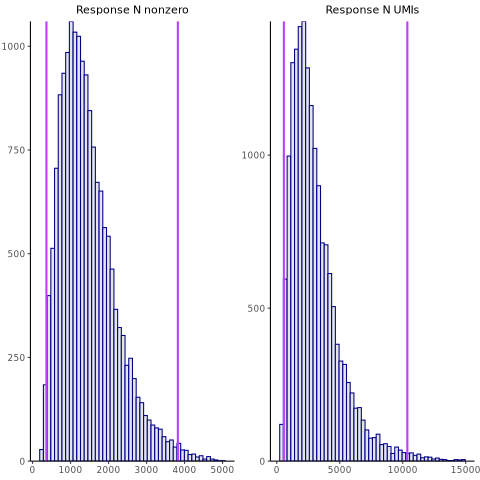

In [59]:
%%R

plot_covariates(sceptre_object_highmoi, p_mito_threshold = 0.25)

In [60]:
%%R
sceptre_object_highmoi <- assign_grnas(
  sceptre_object = sceptre_object_highmoi,
  method = "mixture",
  parallel = FALSE
)

Note: If you are on a Mac laptop or desktop, consider setting `parallel = TRUE` to improve speed. Otherwise, keep `parallel = FALSE`.

Performing gRNA-to-cell assignments for gRNA ACAA1_+_38178488.23-P1P2 (1 of 1926)
Performing gRNA-to-cell assignments for gRNA ACAA1_+_38178620.23-P1P2 (5 of 1926)
Performing gRNA-to-cell assignments for gRNA ACTL7B_-_111617995.23-P1P2 (10 of 1926)
Performing gRNA-to-cell assignments for gRNA ACVR1B_+_52345762.23-P1P2 (15 of 1926)
Performing gRNA-to-cell assignments for gRNA ACVR2A_+_148602343.23-P1P2 (20 of 1926)
Performing gRNA-to-cell assignments for gRNA ACVR2B_+_38495339.23-P1P2 (25 of 1926)
Performing gRNA-to-cell assignments for gRNA ACVR2B_-_38495819.23-P1P2 (30 of 1926)
Performing gRNA-to-cell assignments for gRNA ADCY2_-_7396429.23-P1P2 (35 of 1926)
Performing gRNA-to-cell assignments for gRNA AMOTL2_+_134093279.23-P1P2 (40 of 1926)
Performing gRNA-to-cell assignments for gRNA ANP32E_+_150208342.23-P1P2 (45 of 1926)
Performing gRNA-to-cell ass

In [61]:
%%R
library(Matrix)

# 1. Get the assignment matrix
A <- get_grna_assignments(sceptre_object_highmoi)

# 2. Ensure it is a numeric sparse matrix (1/0)
if (inherits(A, "Matrix") || is.matrix(A)) {
    A_num <- if (inherits(A, "Matrix")) drop0(A * 1) else (A * 1)
} else {
    stop("Output is not a matrix.")
}

# --- FIX: ROBUST NAME RECOVERY ---
# We retrieve names using Sceptre's standard metadata accessors
# instead of touching internal slots like @grna_matrix.

# Try to get cell names from the matrix first
current_cell_names <- colnames(A_num)
current_guide_names <- rownames(A_num)

# If missing, grab them from the main object's covariate data frame
if (is.null(current_cell_names)) {
    message("⚠️ Matrix missing colnames. Fetching from sceptre_object...")
    # The covariate data frame ALWAYS has the cell IDs as rownames
    current_cell_names <- rownames(sceptre_object_highmoi@covariate_data_frame)
    
    # Safety check: lengths must match
    if (length(current_cell_names) != ncol(A_num)) {
        stop(paste("Mismatch! Matrix has", ncol(A_num), "cols but object has", length(current_cell_names), "cells."))
    }
    colnames(A_num) <- current_cell_names
}

# If guide names are missing, they should match the unique values in your guide mapping
if (is.null(current_guide_names)) {
    message("⚠️ Matrix missing rownames. Fetching from guide mapping...")
    # Get unique targets from the mapping table you loaded earlier
    # Note: This assumes the matrix rows are sorted/aligned to these unique targets.
    # In 'mixture' method, rows usually correspond to the 'grna_target' labels.
    
    # SAFE FALLBACK: If we can't be 100% sure of order, we warn the user.
    # But usually, they match the 'grna_target' column from your input.
    unique_targets <- sort(unique(guide_mapping$grna_target))
    
    if (length(unique_targets) == nrow(A_num)) {
         rownames(A_num) <- unique_targets
    } else {
         warning("Could not automatically align target names. Using generic IDs.")
         rownames(A_num) <- paste0("target_", seq_len(nrow(A_num)))
    }
}
# ---------------------------------

# 3. Convert to Long Format
s <- summary(A_num)
assign_long <- data.frame(
    cell_id = colnames(A_num)[s$j],
    grna_target = rownames(A_num)[s$i],
    value = s$x
)

# 4. Save
out_path <- file.path(data_dir, "grna_assignments_long.csv")
write.csv(assign_long, out_path, row.names = FALSE)

message("✅ Saved long CSV to: ", out_path)
print(head(assign_long))

                     cell_id                grna_target value
1 AACGTGATGTGTTCTATACGGTTA_2 CNEP1R1_+_50059217.23-P1P2     1
2 AACGTGATGTGTTCTATACGGTTA_2 SPTY2D1_-_18655660.23-P1P2     1
3 AACGTGATGTGTTCTATACGGTTA_2   TRRAP_-_98476562.23-P1P2     1
4 CCATCCTCCAACCACATTGGGAGA_3 ATP5F1_+_111992171.23-P1P2     1
5 CCATCCTCCAACCACATTGGGAGA_3  C7orf26_+_6629634.23-P1P2     1
6 CCATCCTCCAACCACATTGGGAGA_3   PLCG1_+_39766234.23-P1P2     1


⚠️ Matrix missing colnames. Fetching from sceptre_object...
✅ Saved long CSV to: /oak/stanford/groups/engreitz/Users/tri/CodeBase/programDE/notebooks/d1_sceptre_transfer/grna_assignments_long.csv


In [62]:
%%R
png(file.path(data_dir, "MOI.png"), width = 2400, height = 2000, res = 300)

print(plot(sceptre_object_highmoi))

dev.off()

message("✅ Saved PNG plot to: ", file.path(data_dir, "MOI.png"))

✅ Saved PNG plot to: /oak/stanford/groups/engreitz/Users/tri/CodeBase/programDE/notebooks/d1_sceptre_transfer/MOI.png


In [63]:
%%R
sceptre_object_highmoi <- run_qc(
  sceptre_object = sceptre_object_highmoi,
  p_mito_threshold = 0.25
)

png(file.path(data_dir, "QC.png"), width = 2400, height = 2000, res = 300)

print(plot(sceptre_object_highmoi))

dev.off()

message("✅ Saved PNG plot to: ", file.path(data_dir, "QC.png"))

✅ Saved PNG plot to: /oak/stanford/groups/engreitz/Users/tri/CodeBase/programDE/notebooks/d1_sceptre_transfer/QC.png


In [64]:
%%R
# Calibration check


sceptre_object_highmoi <- run_calibration_check(
  sceptre_object = sceptre_object_highmoi,
  parallel = FALSE
)

png(file.path(data_dir, "calibration_check.png"), width = 2400, height = 2000, res = 300)

print(plot(sceptre_object_highmoi))

dev.off()

message("✅ Saved PNG plot to: ", file.path(data_dir, "calibration_check.png"))


Note: If you are on a Mac laptop or desktop, consider setting `parallel = TRUE` to improve speed. Otherwise, keep `parallel = FALSE`.

Constructing negative control pairs. ✓
Running precomputation on response ENSG00000197747.9 (1 of 242)
Running precomputation on response ENSG00000103035.11 (5 of 242)
Running precomputation on response ENSG00000077150.21 (10 of 242)
Running precomputation on response ENSG00000175198.17 (15 of 242)
Running precomputation on response ENSG00000236859.8 (20 of 242)
Running precomputation on response ENSG00000176171.12 (25 of 242)
Running precomputation on response ENSG00000162733.19 (30 of 242)
Running precomputation on response ENSG00000269547.1 (35 of 242)
Running precomputation on response ENSG00000145996.11 (40 of 242)
Running precomputation on response ENSG00000116141.17 (45 of 242)
Running precomputation on response ENSG00000166025.18 (50 of 242)
Running precomputation on response ENSG00000089775.12 (55 of 242)
Running precomputation on response ENSG

✅ Saved PNG plot to: /oak/stanford/groups/engreitz/Users/tri/CodeBase/programDE/notebooks/d1_sceptre_transfer/calibration_check.png
In addition: There were 50 or more warnings (use warnings() to see the first 50)


In [65]:
%%R
calibration_result <- get_result(
  sceptre_object = sceptre_object_highmoi,
  analysis = "run_calibration_check"
)
head(calibration_result)

          response_id
               <char>
1: ENSG00000121957.15
2: ENSG00000115414.21
3:  ENSG00000122692.9
4: ENSG00000150995.21
5: ENSG00000048471.14
6: ENSG00000149262.19
                                                                                                               grna_target
                                                                                                                    <char>
1: non-targeting_00259&non-targeting_01934&non-targeting_02677&non-targeting_03081&non-targeting_03252&non-targeting_03664
2: non-targeting_00355&non-targeting_00518&non-targeting_00555&non-targeting_00794&non-targeting_01185&non-targeting_02159
3: non-targeting_00184&non-targeting_00259&non-targeting_02159&non-targeting_02571&non-targeting_03029&non-targeting_03081
4: non-targeting_01504&non-targeting_01601&non-targeting_01732&non-targeting_01812&non-targeting_02962&non-targeting_03483
5: non-targeting_00231&non-targeting_01730&non-targeting_02089&non-targeting_03180&non

In [66]:
%%R
sceptre_object_highmoi <- run_discovery_analysis(
  sceptre_object = sceptre_object_highmoi,
  parallel = FALSE
)

png(file.path(data_dir, "discovery.png"), width = 2400, height = 2000, res = 300)

print(plot(sceptre_object_highmoi))

dev.off()

message("✅ Saved PNG plot to: ", file.path(data_dir, "discovery.png"))

Note: If you are on a Mac laptop or desktop, consider setting `parallel = TRUE` to improve speed. Otherwise, keep `parallel = FALSE`.

Running precomputation on response ENSG00000004487.18 (1 of 243)
Running precomputation on response ENSG00000117000.9 (5 of 243)
Running precomputation on response ENSG00000265491.5 (10 of 243)
Running precomputation on response ENSG00000198952.8 (15 of 243)
Running precomputation on response ENSG00000153187.21 (20 of 243)
Running precomputation on response ENSG00000162961.14 (25 of 243)
Running precomputation on response ENSG00000121989.15 (30 of 243)
Running precomputation on response ENSG00000036257.14 (35 of 243)
Running precomputation on response ENSG00000114739.14 (40 of 243)
Running precomputation on response ENSG00000114127.11 (45 of 243)
Running precomputation on response ENSG00000128052.10 (50 of 243)
Running precomputation on response ENSG00000153147.6 (55 of 243)
Running precomputation on response ENSG00000113360.17 (60 of 243)
Running preco

✅ Saved PNG plot to: /oak/stanford/groups/engreitz/Users/tri/CodeBase/programDE/notebooks/d1_sceptre_transfer/discovery.png
In addition: There were 50 or more warnings (use warnings() to see the first 50)


In [67]:
%%R
discovery_result <- get_result(
  sceptre_object = sceptre_object_highmoi,
  analysis = "run_discovery_analysis"
)

write.csv(discovery_result, file.path(data_dir, "TargetKD.csv"), row.names = FALSE)
message("✅ Saved discovery to: ", file.path(data_dir, "TargetKD.csv"))


✅ Saved discovery to: /oak/stanford/groups/engreitz/Users/tri/CodeBase/programDE/notebooks/d1_sceptre_transfer/TargetKD.csv


### Day 2

In [68]:
d2_mdata = mu.read(f"{data_dir}/d2_normalized_gex_and_guide.h5mu")
mdata = d2_mdata

# Filter out cells that have no guides
#mdata = mdata[mdata['GEX'].obs['guides_per_cell'] > 0]

/oak/stanford/groups/engreitz/Users/tri/envs/sceptre_env/lib/python3.10/site-packages/mudata/_core/mudata.py:1598: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/oak/stanford/groups/engreitz/Users/tri/envs/sceptre_env/lib/python3.10/site-packages/mudata/_core/mudata.py:1461: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


In [69]:
# Define a temporary folder for transfer
temp_dir = working_dir + "/d2_sceptre_transfer"
os.makedirs(temp_dir, exist_ok=True)

# 1. EXTRACT MATRICES (Transpose them!)
# Scanpy is (Cells × Genes), Sceptre needs (Genes × Cells)
print("Writing sparse matrices...")
sio.mmwrite(f"{temp_dir}/response_matrix.mtx", mdata['GEX'].layers['raw_counts'].T)
sio.mmwrite(f"{temp_dir}/grna_matrix.mtx", mdata['guide'].X.T)

# 2. EXTRACT NAMES (Row/Col names are lost in .mtx)
# Save Gene names and Guide names to assign them later in R
pd.Series(mdata['GEX'].var_names).to_csv(f"{temp_dir}/gene_names.csv", index=False, header=False)
pd.Series(mdata['guide'].var_names).to_csv(f"{temp_dir}/guide_names.csv", index=False, header=False)
pd.Series(mdata['GEX'].obs_names).to_csv(f"{temp_dir}/cell_names.csv", index=False, header=False)

Writing sparse matrices...


In [70]:
mdata['GEX']

AnnData object with n_obs × n_vars = 21980 × 12732
    obs: 'guides_per_cell', 'guide_umi_counts', 'pct_counts_ribo', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'pool', 'sample_id', 'round1', 'well', 'biological_sample', 'plate', 'bci', 'stype', 'day', 'cell_pool', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'log1p_total_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'S_score', 'G2M_score', 'phase', 'outlier', 'size_factors', 'leiden_res_0.1', 'leiden_res_0.2', 'leiden_res_0.3', 'leiden_res_0.4', 'leiden_res_0.5', 'leiden_res_0.6', 'leiden_res_0.7', 'leiden_res_0.8', 'leiden_res_0.9', 'leiden_res_1.0'
    var: 'gene_id', 'symbol', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'n_counts', 'highly_deviant', 'highly_deviant

In [71]:
# 3. EXTRACT COVARIATES 
rna = mdata['GEX']
covariates_df = pd.DataFrame({
    "batch": rna.obs['sample_id'],
    "grna_n_nonzero": rna.obs['guides_per_cell'],
    "grna_n_umis": rna.obs['guide_umi_counts'],
    "response_n_nonzero": rna.obs['n_genes_by_counts'],
    "response_n_umis": rna.obs['total_counts'],
    "response_p_mito": rna.obs['pct_counts_mt'],
})
covariates_df.to_csv(f"{temp_dir}/covariates.csv")
covariates_df

,batch,grna_n_nonzero,grna_n_umis,response_n_nonzero,response_n_umis,response_p_mito
barcode,,,,,,
TAGGATGAATTGAGGATGCTTGGG_2,300genes:eTN5_GEX_sub2,1,98.0,1276,2078.232178,13.304576
TAGGATGAAGCCATGCCGCCCGGA_2,300genes:eTN5_GEX_sub2,2,142.0,561,849.433411,17.541105
CCAGTTCACAATGGAATGCTTGGG_3,300genes:eTN5_GEX_sub3,5,245.0,1141,1890.696289,15.073812
ATCATTCCAGTCACTACGCCCGGA_2,300genes:eTN5_GEX_sub2,1,18.0,407,549.833374,16.914215
GCGAGTAAGCTAACGACACAATTG_3,300genes:eTN5_GEX_sub3,10,198.0,680,1287.249268,22.101393
...,...,...,...,...,...,...
CCGTGAGAACGCTCGACTTTGGTC_3,300genes:eTN5_GEX_sub3,5,165.0,1783,3590.150391,14.275167
CACCTTACACAGCAGACACAATTG_1,300genes:eTN5_GEX_sub1,17,1121.0,1462,2993.500000,23.300484
CAAGACTAGCCAAGACTAAATATC_3,300genes:eTN5_GEX_sub3,2,134.0,1345,2546.260254,9.209585


In [72]:
guide_meta_df = pd.read_csv(f"{working_dir}/300genes_guide_metadata_v43.tsv", sep='\t')

In [73]:
# 4. PREPARE GUIDE MAPPING 
# Sceptre needs a table mapping 'grna_id' to 'grna_target'.

# 1. Create a "skeleton" DataFrame from the actual matrix order
# This ensures the order matches mdata['guide'].X perfectly
# We name the index 'grna_id' to match Sceptre's expectation immediately
guide_mapping = pd.DataFrame(index=mdata['guide'].var_names)
guide_mapping.index.name = 'grna_id'

# 2. Prepare metadata for merging
# Ensure 'guide_id' is the index so we can map efficiently
lookup_df = guide_meta_df.set_index('guide_id')

# 3. Map the targets onto the skeleton
# We use .loc[] to pull the specific target for each guide in the exact order required
guide_mapping['grna_target'] = lookup_df.loc[guide_mapping.index, 'intended_target_name']

# 4. Reset index so 'grna_id' becomes a column (Sceptre requires this)
guide_mapping = guide_mapping.reset_index()

# ==========================================
# VALIDATION CHECKS 
# ==========================================

# Check 1: Are there any NAs? (Guides in mdata that were missing from meta_df)
na_count = guide_mapping['grna_target'].isna().sum()
if na_count > 0:
    print(f"⚠️ WARNING: {na_count} guides have NaN targets! These will crash Sceptre.")
else:
    print("✅ All guides mapped successfully.")

# Check 2: Verify the first few rows manually
print("\nFirst 5 rows of mapping (Must match mdata['guide'].var_names order):")
print(guide_mapping.head())

# 5. Save for Sceptre
guide_mapping.to_csv(f"{temp_dir}/guide_mapping.csv", index=False)

✅ All guides mapped successfully.

First 5 rows of mapping (Must match mdata['guide'].var_names order):
                    grna_id grna_target
0  ACAA1_+_38178488.23-P1P2       ACAA1
1  ACAA1_+_38178517.23-P1P2       ACAA1
2  ACAA1_+_38178559.23-P1P2       ACAA1
3  ACAA1_+_38178570.23-P1P2       ACAA1
4  ACAA1_+_38178620.23-P1P2       ACAA1


In [74]:
guide_mapping

,grna_id,grna_target
0,ACAA1_+_38178488.23-P1P2,ACAA1
1,ACAA1_+_38178517.23-P1P2,ACAA1
2,ACAA1_+_38178559.23-P1P2,ACAA1
3,ACAA1_+_38178570.23-P1P2,ACAA1
4,ACAA1_+_38178620.23-P1P2,ACAA1
...,...,...
1921,SUZ12_SGTN_23,SUZ12
1922,MESDC1_SGTN_11,TLNRD1
1923,MESDC1_SGTN_12,TLNRD1
1924,TP53_SGTN_01,TP53


In [75]:
# Create a mapping from the Gene Symbol (which matches your guides)
# to the Gene Index (which matches the matrix rownames)

# Check which column in mdata['GEX'].var holds the symbol
symbol_col = 'symbol' 

gene_map = mdata['GEX'].var[[symbol_col]].reset_index()
gene_map.columns = ['response_id', 'grna_target'] # Rename for easy merging in R

# Save it
gene_map.to_csv(f"{temp_dir}/gene_symbol_map.csv", index=False)
print("✅ Gene mapping saved.")

✅ Gene mapping saved.


In [76]:
gene_map

,response_id,grna_target
0,ENSG00000227232.5,WASH7P
1,ENSG00000238009.6,ENSG00000238009
2,ENSG00000241860.7,ENSG00000241860
3,ENSG00000279457.4,WASH9P
4,ENSG00000228463.10,ENSG00000228463
...,...,...
12727,ENSG00000198727.2,MT-CYB
12728,ENSG00000210196.2,MT-TP
12729,ENSG00000271254.7,ENSG00000271254
12730,ENSG00000276345.1,ENSG00000276345


#### Import data to SCEPTRE (Rcell)

In [77]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [78]:
%%R
library(sceptre)
library(Matrix)

# Define path
data_dir <- "/oak/stanford/groups/engreitz/Users/tri/CodeBase/programDE/notebooks/d2_sceptre_transfer"

# 1. LOAD MATRICES
cat("Loading matrices into R...\n")
response_mat <- readMM(file.path(data_dir, "response_matrix.mtx"))
grna_mat <- readMM(file.path(data_dir, "grna_matrix.mtx"))

# 2. ATTACH NAMES
gene_names <- read.csv(file.path(data_dir, "gene_names.csv"), header=FALSE)$V1
guide_names <- read.csv(file.path(data_dir, "guide_names.csv"), header=FALSE)$V1
cell_names <- read.csv(file.path(data_dir, "cell_names.csv"), header=FALSE)$V1

rownames(response_mat) <- gene_names
colnames(response_mat) <- cell_names

rownames(grna_mat) <- guide_names
colnames(grna_mat) <- cell_names

Loading matrices into R...


In [79]:
%%R

# 3. LOAD METADATA
covariates <- read.csv(file.path(data_dir, "covariates.csv"), row.names=1)
guide_mapping <- read.csv(file.path(data_dir, "guide_mapping.csv"))

# ==============================================================================
# FIX: RENAME 'response_p_mito' SO WE KEEP IT
# Sceptre blocks the name 'response_p_mito' but doesn't calculate it.
# We rename it to 'mt_percent' so we can use it as a covariate later.
# ==============================================================================

# 1. Rename response_p_mito if it exists
if ("response_p_mito" %in% colnames(covariates)) {
    cat("Renaming 'response_p_mito' to 'mt_percent'...\n")
    names(covariates)[names(covariates) == "response_p_mito"] <- "mt_percent"
}

# 2. DROP OTHER RESERVED COLUMNS (which Sceptre DOES calculate)
# We still drop n_umis and n_nonzero because Sceptre re-calculates those automatically.
reserved_cols <- c("response_n_nonzero", "response_n_umis", "grna_n_nonzero", "grna_n_umis")
covariates <- covariates[, !(colnames(covariates) %in% reserved_cols), drop=FALSE]

# 4. CREATE SCEPTRE OBJECT
sceptre_object <- import_data(
  response_matrix = response_mat,
  grna_matrix = grna_mat,
  grna_target_data_frame = guide_mapping,
  extra_covariates = covariates,
  moi = "high"
)

print("✅ Sceptre object created!")
print(head(sceptre_object@covariate_data_frame))

Renaming 'response_p_mito' to 'mt_percent'...
[1] "\u2705 Sceptre object created!"
                           response_n_nonzero response_n_umis grna_n_nonzero
TAGGATGAATTGAGGATGCTTGGG_2               1101       2078.2321              6
TAGGATGAAGCCATGCCGCCCGGA_2                494        849.4334             28
CCAGTTCACAATGGAATGCTTGGG_3                969       1890.6964             24
ATCATTCCAGTCACTACGCCCGGA_2                355        549.8333              9
GCGAGTAAGCTAACGACACAATTG_3                613       1287.2493             43
TCTTCACACAATGGAACTTTGGTC_1                694       1432.8333             59
                           grna_n_umis                  batch mt_percent
TAGGATGAATTGAGGATGCTTGGG_2          98 300genes:eTN5_GEX_sub2   13.30458
TAGGATGAAGCCATGCCGCCCGGA_2         142 300genes:eTN5_GEX_sub2   17.54111
CCAGTTCACAATGGAATGCTTGGG_3         245 300genes:eTN5_GEX_sub3   15.07381
ATCATTCCAGTCACTACGCCCGGA_2          18 300genes:eTN5_GEX_sub2   16.91421
GCGAGTAAGCTAA

In [80]:
%%R
# 1. Load the translation map
gene_map <- read.csv(file.path(data_dir, "gene_symbol_map.csv"))

# 2. Start with guide mapping (which has 'grna_target' as Symbol)
discovery_pairs_highmoi <- guide_mapping

# 3. Merge to attach the correct response_id (Gene ID)
#    This matches 'grna_target' in guides to 'grna_target' in the gene map
discovery_pairs_highmoi <- merge(discovery_pairs_highmoi, gene_map, by="grna_target")

# 4. Select ONLY the two columns Sceptre needs
#    (We filter out non-targeting guides automatically via the merge)
discovery_pairs_highmoi <- discovery_pairs_highmoi[, c("grna_target", "response_id")]

# 5. DEDUPLICATE
#    Sceptre performs analysis at the *Target* level, not the *Guide* level.
#    We only need one row per Target-Gene pair.
discovery_pairs_highmoi <- unique(discovery_pairs_highmoi)

print(paste("Unique pairs to test:", nrow(discovery_pairs_highmoi)))
print(head(discovery_pairs_highmoi))

[1] "Unique pairs to test: 279"
   grna_target        response_id
1        ACAA1 ENSG00000060971.19
7       ACVR1B ENSG00000135503.13
13      ACVR2A ENSG00000121989.15
19      ACVR2B ENSG00000114739.14
25       ADCY2 ENSG00000078295.17
31      AMOTL2 ENSG00000114019.15


In [81]:
%%R 

sceptre_object_highmoi <- set_analysis_parameters(
  sceptre_object = sceptre_object,
  discovery_pairs = discovery_pairs_highmoi,
  side = "both", control_group = "complement")

In [82]:
%%R

png(file.path(data_dir, "grna_count_distributions.png"), width = 3000, height = 2000, res = 300)

print(plot_grna_count_distributions(
  sceptre_object = sceptre_object_highmoi,
  n_grnas_to_plot = 8
))

dev.off()

message("✅ Saved PNG plot to: ", file.path(data_dir, "grna_count_distributions.png"))

✅ Saved PNG plot to: /oak/stanford/groups/engreitz/Users/tri/CodeBase/programDE/notebooks/d2_sceptre_transfer/grna_count_distributions.png


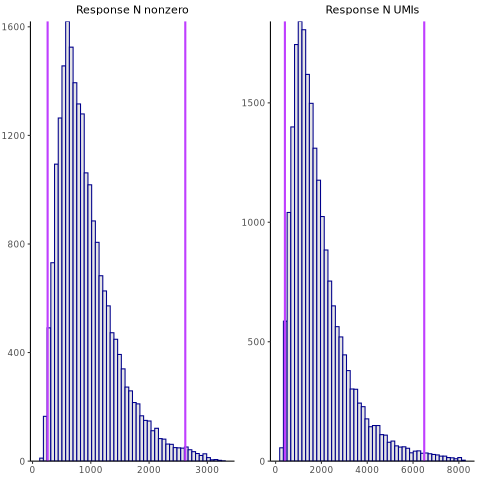

In [83]:
%%R

plot_covariates(sceptre_object_highmoi, p_mito_threshold = 0.25)

In [84]:
%%R
sceptre_object_highmoi <- assign_grnas(
  sceptre_object = sceptre_object_highmoi,
  method = "mixture",
  parallel = FALSE
)

Note: If you are on a Mac laptop or desktop, consider setting `parallel = TRUE` to improve speed. Otherwise, keep `parallel = FALSE`.

Performing gRNA-to-cell assignments for gRNA ACAA1_+_38178488.23-P1P2 (1 of 1926)
Performing gRNA-to-cell assignments for gRNA ACAA1_+_38178620.23-P1P2 (5 of 1926)
Performing gRNA-to-cell assignments for gRNA ACTL7B_-_111617995.23-P1P2 (10 of 1926)
Performing gRNA-to-cell assignments for gRNA ACVR1B_+_52345762.23-P1P2 (15 of 1926)
Performing gRNA-to-cell assignments for gRNA ACVR2A_+_148602343.23-P1P2 (20 of 1926)
Performing gRNA-to-cell assignments for gRNA ACVR2B_+_38495339.23-P1P2 (25 of 1926)
Performing gRNA-to-cell assignments for gRNA ACVR2B_-_38495819.23-P1P2 (30 of 1926)
Performing gRNA-to-cell assignments for gRNA ADCY2_-_7396429.23-P1P2 (35 of 1926)
Performing gRNA-to-cell assignments for gRNA AMOTL2_+_134093279.23-P1P2 (40 of 1926)
Performing gRNA-to-cell assignments for gRNA ANP32E_+_150208342.23-P1P2 (45 of 1926)
Performing gRNA-to-cell ass

In [85]:
%%R
library(Matrix)

# 1. Get the assignment matrix
A <- get_grna_assignments(sceptre_object_highmoi)

# 2. Ensure it is a numeric sparse matrix (1/0)
if (inherits(A, "Matrix") || is.matrix(A)) {
    A_num <- if (inherits(A, "Matrix")) drop0(A * 1) else (A * 1)
} else {
    stop("Output is not a matrix.")
}

# --- FIX: ROBUST NAME RECOVERY ---
# We retrieve names using Sceptre's standard metadata accessors
# instead of touching internal slots like @grna_matrix.

# Try to get cell names from the matrix first
current_cell_names <- colnames(A_num)
current_guide_names <- rownames(A_num)

# If missing, grab them from the main object's covariate data frame
if (is.null(current_cell_names)) {
    message("⚠️ Matrix missing colnames. Fetching from sceptre_object...")
    # The covariate data frame ALWAYS has the cell IDs as rownames
    current_cell_names <- rownames(sceptre_object_highmoi@covariate_data_frame)
    
    # Safety check: lengths must match
    if (length(current_cell_names) != ncol(A_num)) {
        stop(paste("Mismatch! Matrix has", ncol(A_num), "cols but object has", length(current_cell_names), "cells."))
    }
    colnames(A_num) <- current_cell_names
}

# If guide names are missing, they should match the unique values in your guide mapping
if (is.null(current_guide_names)) {
    message("⚠️ Matrix missing rownames. Fetching from guide mapping...")
    # Get unique targets from the mapping table you loaded earlier
    # Note: This assumes the matrix rows are sorted/aligned to these unique targets.
    # In 'mixture' method, rows usually correspond to the 'grna_target' labels.
    
    # SAFE FALLBACK: If we can't be 100% sure of order, we warn the user.
    # But usually, they match the 'grna_target' column from your input.
    unique_targets <- sort(unique(guide_mapping$grna_target))
    
    if (length(unique_targets) == nrow(A_num)) {
         rownames(A_num) <- unique_targets
    } else {
         warning("Could not automatically align target names. Using generic IDs.")
         rownames(A_num) <- paste0("target_", seq_len(nrow(A_num)))
    }
}
# ---------------------------------

# 3. Convert to Long Format
s <- summary(A_num)
assign_long <- data.frame(
    cell_id = colnames(A_num)[s$j],
    grna_target = rownames(A_num)[s$i],
    value = s$x
)

# 4. Save
out_path <- file.path(data_dir, "grna_assignments_long.csv")
write.csv(assign_long, out_path, row.names = FALSE)

message("✅ Saved long CSV to: ", out_path)
print(head(assign_long))

                     cell_id                grna_target value
1 TAGGATGAATTGAGGATGCTTGGG_2    PTEN_+_89623388.23-P1P2     1
2 TAGGATGAAGCCATGCCGCCCGGA_2  CCNT2_-_135676427.23-P1P2     1
3 TAGGATGAAGCCATGCCGCCCGGA_2      PBLD_-_70092630.23-P1     1
4 TAGGATGAAGCCATGCCGCCCGGA_2 PIK3CA_-_178866211.23-P1P2     1
5 TAGGATGAAGCCATGCCGCCCGGA_2 SMARCC1_+_47822975.23-P1P2     1
6 CCAGTTCACAATGGAATGCTTGGG_3   COPS4_-_83956484.23-P1P2     1


⚠️ Matrix missing colnames. Fetching from sceptre_object...
✅ Saved long CSV to: /oak/stanford/groups/engreitz/Users/tri/CodeBase/programDE/notebooks/d2_sceptre_transfer/grna_assignments_long.csv


In [86]:
%%R
png(file.path(data_dir, "MOI.png"), width = 2400, height = 2000, res = 300)

print(plot(sceptre_object_highmoi))

dev.off()

message("✅ Saved PNG plot to: ", file.path(data_dir, "MOI.png"))

✅ Saved PNG plot to: /oak/stanford/groups/engreitz/Users/tri/CodeBase/programDE/notebooks/d2_sceptre_transfer/MOI.png


In [87]:
%%R
sceptre_object_highmoi <- run_qc(
  sceptre_object = sceptre_object_highmoi,
  p_mito_threshold = 0.25
)

png(file.path(data_dir, "QC.png"), width = 2400, height = 2000, res = 300)

print(plot(sceptre_object_highmoi))

dev.off()

message("✅ Saved PNG plot to: ", file.path(data_dir, "QC.png"))

✅ Saved PNG plot to: /oak/stanford/groups/engreitz/Users/tri/CodeBase/programDE/notebooks/d2_sceptre_transfer/QC.png


In [88]:
%%R
# Calibration check


sceptre_object_highmoi <- run_calibration_check(
  sceptre_object = sceptre_object_highmoi,
  parallel = FALSE
)

png(file.path(data_dir, "calibration_check.png"), width = 2400, height = 2000, res = 300)

print(plot(sceptre_object_highmoi))

dev.off()

message("✅ Saved PNG plot to: ", file.path(data_dir, "calibration_check.png"))


Note: If you are on a Mac laptop or desktop, consider setting `parallel = TRUE` to improve speed. Otherwise, keep `parallel = FALSE`.

Constructing negative control pairs. ✓
Running precomputation on response ENSG00000143545.10 (1 of 226)
Running precomputation on response ENSG00000132603.15 (5 of 226)
Running precomputation on response ENSG00000155252.14 (10 of 226)
Running precomputation on response ENSG00000154175.18 (15 of 226)
Running precomputation on response ENSG00000230590.13 (20 of 226)
Running precomputation on response ENSG00000290146.1 (25 of 226)
Running precomputation on response ENSG00000035115.22 (30 of 226)
Running precomputation on response ENSG00000115207.15 (35 of 226)
Running precomputation on response ENSG00000140259.7 (40 of 226)
Running precomputation on response ENSG00000169180.12 (45 of 226)
Running precomputation on response ENSG00000110330.10 (50 of 226)
Running precomputation on response ENSG00000226361.5 (55 of 226)
Running precomputation on response ENSG

✅ Saved PNG plot to: /oak/stanford/groups/engreitz/Users/tri/CodeBase/programDE/notebooks/d2_sceptre_transfer/calibration_check.png
In addition: There were 50 or more warnings (use warnings() to see the first 50)


In [89]:
%%R
calibration_result <- get_result(
  sceptre_object = sceptre_object_highmoi,
  analysis = "run_calibration_check"
)
head(calibration_result)

          response_id
               <char>
1:  ENSG00000290263.1
2: ENSG00000134371.14
3:  ENSG00000100591.8
4: ENSG00000143742.14
5: ENSG00000163930.10
6:  ENSG00000237350.1
                                                                                                               grna_target
                                                                                                                    <char>
1: non-targeting_00233&non-targeting_00390&non-targeting_01601&non-targeting_02009&non-targeting_02288&non-targeting_03029
2:

 non-targeting_00014&non-targeting_00259&non-targeting_00629&non-targeting_01601&non-targeting_01732&non-targeting_02837
3: non-targeting_00614&non-targeting_00972&non-targeting_02911&non-targeting_03081&non-targeting_03180&non-targeting_03384
4: non-targeting_00324&non-targeting_00629&non-targeting_00972&non-targeting_02677&non-targeting_03252&non-targeting_03664
5: non-targeting_00629&non-targeting_01185&non-targeting_01732&non-targeting_02089&non-targeting_02677&non-targeting_03483
6: non-targeting_00014&non-targeting_00117&non-targeting_00196&non-targeting_00555&non-targeting_02025&non-targeting_02193
   n_nonzero_trt n_nonzero_cntrl pass_qc     p_value log_2_fold_change
           <int>           <int>  <lgcl>       <num>             <num>
1:            25             843    TRUE 0.003853224         0.8886069
2:            44            3161    TRUE 0.016145901        -0.4608229
3:            13             997    TRUE 0.018890360        -0.8134084
4:            53            3475

In [90]:
%%R
sceptre_object_highmoi <- run_discovery_analysis(
  sceptre_object = sceptre_object_highmoi,
  parallel = FALSE
)

png(file.path(data_dir, "discovery.png"), width = 2400, height = 2000, res = 300)

print(plot(sceptre_object_highmoi))

dev.off()

message("✅ Saved PNG plot to: ", file.path(data_dir, "discovery.png"))

Note: If you are on a Mac laptop or desktop, consider setting `parallel = TRUE` to improve speed. Otherwise, keep `parallel = FALSE`.

Running precomputation on response ENSG00000004487.18 (1 of 227)
Running precomputation on response ENSG00000116459.11 (5 of 227)
Running precomputation on response ENSG00000163348.4 (10 of 227)
Running precomputation on response ENSG00000138018.19 (15 of 227)
Running precomputation on response ENSG00000124380.11 (20 of 227)
Running precomputation on response ENSG00000138385.16 (25 of 227)
Running precomputation on response ENSG00000170142.12 (30 of 227)
Running precomputation on response ENSG00000114019.15 (35 of 227)
Running precomputation on response ENSG00000128052.10 (40 of 227)
Running precomputation on response ENSG00000109436.8 (45 of 227)
Running precomputation on response ENSG00000113360.17 (50 of 227)
Running precomputation on response ENSG00000120733.14 (55 of 227)
Running precomputation on response ENSG00000124766.7 (60 of 227)
Running prec

✅ Saved PNG plot to: /oak/stanford/groups/engreitz/Users/tri/CodeBase/programDE/notebooks/d2_sceptre_transfer/discovery.png
In addition: There were 50 or more warnings (use warnings() to see the first 50)


In [91]:
%%R
discovery_result <- get_result(
  sceptre_object = sceptre_object_highmoi,
  analysis = "run_discovery_analysis"
)

write.csv(discovery_result, file.path(data_dir, "TargetKD.csv"), row.names = FALSE)
message("✅ Saved discovery to: ", file.path(data_dir, "TargetKD.csv"))


✅ Saved discovery to: /oak/stanford/groups/engreitz/Users/tri/CodeBase/programDE/notebooks/d2_sceptre_transfer/TargetKD.csv


### Day 3

In [8]:
import scipy.io as sio
import pandas as pd
import os

In [9]:
d3_mdata = mu.read(f"{data_dir}/d3_normalized_gex_and_guide.h5mu")
mdata = d3_mdata

# Filter out cells that have no guides
#mdata = mdata[mdata['GEX'].obs['guides_per_cell'] > 0]

/oak/stanford/groups/engreitz/Users/tri/envs/sceptre_env/lib/python3.10/site-packages/mudata/_core/mudata.py:1598: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/oak/stanford/groups/engreitz/Users/tri/envs/sceptre_env/lib/python3.10/site-packages/mudata/_core/mudata.py:1461: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


In [10]:
# Define a temporary folder for transfer
temp_dir = working_dir + "/d3_sceptre_transfer"
os.makedirs(temp_dir, exist_ok=True)

# 1. EXTRACT MATRICES (Transpose them!)
# Scanpy is (Cells × Genes), Sceptre needs (Genes × Cells)
print("Writing sparse matrices...")
sio.mmwrite(f"{temp_dir}/response_matrix.mtx", mdata['GEX'].layers['raw_counts'].T)
sio.mmwrite(f"{temp_dir}/grna_matrix.mtx", mdata['guide'].X.T)

# 2. EXTRACT NAMES (Row/Col names are lost in .mtx)
# Save Gene names and Guide names to assign them later in R
pd.Series(mdata['GEX'].var_names).to_csv(f"{temp_dir}/gene_names.csv", index=False, header=False)
pd.Series(mdata['guide'].var_names).to_csv(f"{temp_dir}/guide_names.csv", index=False, header=False)
pd.Series(mdata['GEX'].obs_names).to_csv(f"{temp_dir}/cell_names.csv", index=False, header=False)

Writing sparse matrices...


In [11]:
mdata['GEX']

AnnData object with n_obs × n_vars = 44102 × 14712
    obs: 'guides_per_cell', 'guide_umi_counts', 'pct_counts_ribo', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'pool', 'sample_id', 'round1', 'well', 'biological_sample', 'plate', 'bci', 'stype', 'day', 'cell_pool', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'log1p_total_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'S_score', 'G2M_score', 'phase', 'outlier', 'size_factors', 'leiden_res_0.1', 'leiden_res_0.2', 'leiden_res_0.3', 'leiden_res_0.4', 'leiden_res_0.5', 'leiden_res_0.6', 'leiden_res_0.7', 'leiden_res_0.8', 'leiden_res_0.9', 'leiden_res_1.0'
    var: 'gene_id', 'symbol', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'n_counts', 'highly_deviant', 'highly_deviant

In [12]:
# 3. EXTRACT COVARIATES 
rna = mdata['GEX']
covariates_df = pd.DataFrame({
    "batch": rna.obs['sample_id'],
    "grna_n_nonzero": rna.obs['guides_per_cell'],
    "grna_n_umis": rna.obs['guide_umi_counts'],
    "response_n_nonzero": rna.obs['n_genes_by_counts'],
    "response_n_umis": rna.obs['total_counts'],
    "response_p_mito": rna.obs['pct_counts_mt'],
})
covariates_df.to_csv(f"{temp_dir}/covariates.csv")
covariates_df

,batch,grna_n_nonzero,grna_n_umis,response_n_nonzero,response_n_umis,response_p_mito
barcode,,,,,,
GACAGTGCCCTCTATCTCACTTTA_2,300genes:eTN5_GEX_sub2,4,70.0,786,1109.333252,9.375001
ACAGCAGACTGAGCCACTATTTCA_1,300genes:eTN5_GEX_sub1,1,908.0,1086,1671.621948,9.092965
CCTCCTGAATCCTGTACGCTTAAA_3,300genes:eTN5_GEX_sub3,1,121.0,1493,2472.592041,15.483077
GTACGCAAATCATTCCCATTTGGA_3,300genes:eTN5_GEX_sub3,2,59.0,1792,3231.275391,12.533751
CAACCACAAAACATCGGACCTTTC_1,300genes:eTN5_GEX_sub1,3,380.0,847,1556.620483,18.148289
...,...,...,...,...,...,...
AATCCGTCTCTTCACAGTTACGTA_1,300genes:eTN5_GEX_sub1,1,16.0,870,1732.666626,9.320893
ATCATTCCCGACACACTCACTTTA_2,300genes:eTN5_GEX_sub2,1,33.0,607,912.434875,18.521870
AACAACCAACACAGAAGACCTTTC_1,300genes:eTN5_GEX_sub1,9,249.0,2098,4470.594727,14.371690


In [13]:
guide_meta_df = pd.read_csv(f"{working_dir}/300genes_guide_metadata_v43.tsv", sep='\t')

In [14]:
# 4. PREPARE GUIDE MAPPING 
# Sceptre needs a table mapping 'grna_id' to 'grna_target'.

# 1. Create a "skeleton" DataFrame from the actual matrix order
# This ensures the order matches mdata['guide'].X perfectly
# We name the index 'grna_id' to match Sceptre's expectation immediately
guide_mapping = pd.DataFrame(index=mdata['guide'].var_names)
guide_mapping.index.name = 'grna_id'

# 2. Prepare metadata for merging
# Ensure 'guide_id' is the index so we can map efficiently
lookup_df = guide_meta_df.set_index('guide_id')

# 3. Map the targets onto the skeleton
# We use .loc[] to pull the specific target for each guide in the exact order required
guide_mapping['grna_target'] = lookup_df.loc[guide_mapping.index, 'intended_target_name']

# 4. Reset index so 'grna_id' becomes a column (Sceptre requires this)
guide_mapping = guide_mapping.reset_index()

# ==========================================
# VALIDATION CHECKS 
# ==========================================

# Check 1: Are there any NAs? (Guides in mdata that were missing from meta_df)
na_count = guide_mapping['grna_target'].isna().sum()
if na_count > 0:
    print(f"⚠️ WARNING: {na_count} guides have NaN targets! These will crash Sceptre.")
else:
    print("✅ All guides mapped successfully.")

# Check 2: Verify the first few rows manually
print("\nFirst 5 rows of mapping (Must match mdata['guide'].var_names order):")
print(guide_mapping.head())

# 5. Save for Sceptre
guide_mapping.to_csv(f"{temp_dir}/guide_mapping.csv", index=False)

✅ All guides mapped successfully.

First 5 rows of mapping (Must match mdata['guide'].var_names order):
                    grna_id grna_target
0  ACAA1_+_38178488.23-P1P2       ACAA1
1  ACAA1_+_38178517.23-P1P2       ACAA1
2  ACAA1_+_38178559.23-P1P2       ACAA1
3  ACAA1_+_38178570.23-P1P2       ACAA1
4  ACAA1_+_38178620.23-P1P2       ACAA1


In [15]:
guide_mapping

,grna_id,grna_target
0,ACAA1_+_38178488.23-P1P2,ACAA1
1,ACAA1_+_38178517.23-P1P2,ACAA1
2,ACAA1_+_38178559.23-P1P2,ACAA1
3,ACAA1_+_38178570.23-P1P2,ACAA1
4,ACAA1_+_38178620.23-P1P2,ACAA1
...,...,...
1921,SUZ12_SGTN_23,SUZ12
1922,MESDC1_SGTN_11,TLNRD1
1923,MESDC1_SGTN_12,TLNRD1
1924,TP53_SGTN_01,TP53


In [16]:
# Create a mapping from the Gene Symbol (which matches your guides)
# to the Gene Index (which matches the matrix rownames)

# Check which column in mdata['GEX'].var holds the symbol
symbol_col = 'symbol' 

gene_map = mdata['GEX'].var[[symbol_col]].reset_index()
gene_map.columns = ['response_id', 'grna_target'] # Rename for easy merging in R

# Save it
gene_map.to_csv(f"{temp_dir}/gene_symbol_map.csv", index=False)
print("✅ Gene mapping saved.")

✅ Gene mapping saved.


In [17]:
gene_map

,response_id,grna_target
0,ENSG00000227232.5,WASH7P
1,ENSG00000238009.6,ENSG00000238009
2,ENSG00000241860.7,ENSG00000241860
3,ENSG00000279457.4,WASH9P
4,ENSG00000228463.10,ENSG00000228463
...,...,...
14707,ENSG00000275757.1,5_8S_rRNA
14708,ENSG00000276256.1,ENSG00000276256
14709,ENSG00000273748.1,ENSG00000273748
14710,ENSG00000274917.1,RNA5-8SN5


#### Import data to SCEPTRE (Rcell)

In [18]:
%load_ext rpy2.ipython

In [19]:
%%R
library(sceptre)
library(Matrix)

# Define path
data_dir <- "/oak/stanford/groups/engreitz/Users/tri/CodeBase/programDE/notebooks/d3_sceptre_transfer"

# 1. LOAD MATRICES
cat("Loading matrices into R...\n")
response_mat <- readMM(file.path(data_dir, "response_matrix.mtx"))
grna_mat <- readMM(file.path(data_dir, "grna_matrix.mtx"))

# 2. ATTACH NAMES
gene_names <- read.csv(file.path(data_dir, "gene_names.csv"), header=FALSE)$V1
guide_names <- read.csv(file.path(data_dir, "guide_names.csv"), header=FALSE)$V1
cell_names <- read.csv(file.path(data_dir, "cell_names.csv"), header=FALSE)$V1

rownames(response_mat) <- gene_names
colnames(response_mat) <- cell_names

rownames(grna_mat) <- guide_names
colnames(grna_mat) <- cell_names

Loading matrices into R...


In [20]:
%%R

# 3. LOAD METADATA
covariates <- read.csv(file.path(data_dir, "covariates.csv"), row.names=1)
guide_mapping <- read.csv(file.path(data_dir, "guide_mapping.csv"))

# ==============================================================================
# FIX: RENAME 'response_p_mito' SO WE KEEP IT
# Sceptre blocks the name 'response_p_mito' but doesn't calculate it.
# We rename it to 'mt_percent' so we can use it as a covariate later.
# ==============================================================================

# 1. Rename response_p_mito if it exists
if ("response_p_mito" %in% colnames(covariates)) {
    cat("Renaming 'response_p_mito' to 'mt_percent'...\n")
    names(covariates)[names(covariates) == "response_p_mito"] <- "mt_percent"
}

# 2. DROP OTHER RESERVED COLUMNS (which Sceptre DOES calculate)
# We still drop n_umis and n_nonzero because Sceptre re-calculates those automatically.
reserved_cols <- c("response_n_nonzero", "response_n_umis", "grna_n_nonzero", "grna_n_umis")
covariates <- covariates[, !(colnames(covariates) %in% reserved_cols), drop=FALSE]

# 4. CREATE SCEPTRE OBJECT
sceptre_object <- import_data(
  response_matrix = response_mat,
  grna_matrix = grna_mat,
  grna_target_data_frame = guide_mapping,
  extra_covariates = covariates,
  moi = "high"
)

print("✅ Sceptre object created!")
print(head(sceptre_object@covariate_data_frame))

Renaming 'response_p_mito' to 'mt_percent'...
[1] "\u2705 Sceptre object created!"
                           response_n_nonzero response_n_umis grna_n_nonzero
GACAGTGCCCTCTATCTCACTTTA_2                693       1109.3333             24
ACAGCAGACTGAGCCACTATTTCA_1                920       1671.6219             97
CCTCCTGAATCCTGTACGCTTAAA_3               1281       2472.5923             26
GTACGCAAATCATTCCCATTTGGA_3               1581       3231.2755             16
CAACCACAAAACATCGGACCTTTC_1                759       1556.6205             96
TGGTGGTAAATGTTGCACTATATA_3                515        858.7499             25
                           grna_n_umis                  batch mt_percent
GACAGTGCCCTCTATCTCACTTTA_2          70 300genes:eTN5_GEX_sub2   9.375001
ACAGCAGACTGAGCCACTATTTCA_1         908 300genes:eTN5_GEX_sub1   9.092965
CCTCCTGAATCCTGTACGCTTAAA_3         121 300genes:eTN5_GEX_sub3  15.483077
GTACGCAAATCATTCCCATTTGGA_3          59 300genes:eTN5_GEX_sub3  12.533751
CAACCACAAAACA

In [21]:
%%R
# 1. Load the translation map
gene_map <- read.csv(file.path(data_dir, "gene_symbol_map.csv"))

# 2. Start with guide mapping (which has 'grna_target' as Symbol)
discovery_pairs_highmoi <- guide_mapping

# 3. Merge to attach the correct response_id (Gene ID)
#    This matches 'grna_target' in guides to 'grna_target' in the gene map
discovery_pairs_highmoi <- merge(discovery_pairs_highmoi, gene_map, by="grna_target")

# 4. Select ONLY the two columns Sceptre needs
#    (We filter out non-targeting guides automatically via the merge)
discovery_pairs_highmoi <- discovery_pairs_highmoi[, c("grna_target", "response_id")]

# 5. DEDUPLICATE
#    Sceptre performs analysis at the *Target* level, not the *Guide* level.
#    We only need one row per Target-Gene pair.
discovery_pairs_highmoi <- unique(discovery_pairs_highmoi)

print(paste("Unique pairs to test:", nrow(discovery_pairs_highmoi)))
print(head(discovery_pairs_highmoi))

[1] "Unique pairs to test: 287"
   grna_target        response_id
1        ACAA1 ENSG00000060971.19
7       ACVR1B ENSG00000135503.13
13      ACVR2A ENSG00000121989.15
19      ACVR2B ENSG00000114739.14
25       ADCY2 ENSG00000078295.17
31      AMOTL2 ENSG00000114019.15


In [22]:
%%R 

sceptre_object_highmoi <- set_analysis_parameters(
  sceptre_object = sceptre_object,
  discovery_pairs = discovery_pairs_highmoi,
  side = "both", control_group = "complement")

In [23]:
%%R

png(file.path(data_dir, "grna_count_distributions.png"), width = 3000, height = 2000, res = 300)

print(plot_grna_count_distributions(
  sceptre_object = sceptre_object_highmoi,
  n_grnas_to_plot = 8
))

dev.off()

message("✅ Saved PNG plot to: ", file.path(data_dir, "grna_count_distributions.png"))

✅ Saved PNG plot to: /oak/stanford/groups/engreitz/Users/tri/CodeBase/programDE/notebooks/d3_sceptre_transfer/grna_count_distributions.png


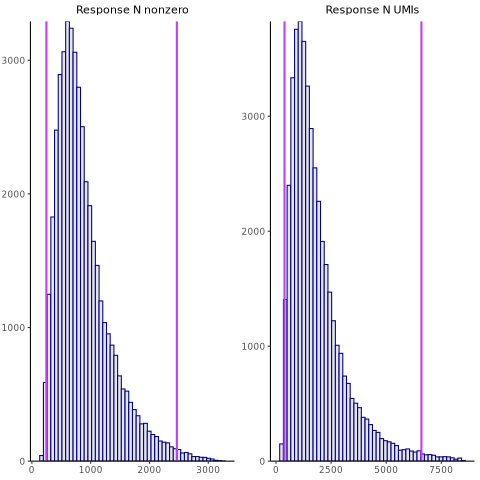

In [24]:
%%R

plot_covariates(sceptre_object_highmoi, p_mito_threshold = 0.25)

In [25]:
%%R
sceptre_object_highmoi <- assign_grnas(
  sceptre_object = sceptre_object_highmoi,
  method = "mixture",
  parallel = FALSE
)

Note: If you are on a Mac laptop or desktop, consider setting `parallel = TRUE` to improve speed. Otherwise, keep `parallel = FALSE`.

Performing gRNA-to-cell assignments for gRNA ACAA1_+_38178488.23-P1P2 (1 of 1926)
Performing gRNA-to-cell assignments for gRNA ACAA1_+_38178620.23-P1P2 (5 of 1926)
Performing gRNA-to-cell assignments for gRNA ACTL7B_-_111617995.23-P1P2 (10 of 1926)
Performing gRNA-to-cell assignments for gRNA ACVR1B_+_52345762.23-P1P2 (15 of 1926)
Performing gRNA-to-cell assignments for gRNA ACVR2A_+_148602343.23-P1P2 (20 of 1926)
Performing gRNA-to-cell assignments for gRNA ACVR2B_+_38495339.23-P1P2 (25 of 1926)
Performing gRNA-to-cell assignments for gRNA ACVR2B_-_38495819.23-P1P2 (30 of 1926)
Performing gRNA-to-cell assignments for gRNA ADCY2_-_7396429.23-P1P2 (35 of 1926)
Performing gRNA-to-cell assignments for gRNA AMOTL2_+_134093279.23-P1P2 (40 of 1926)
Performing gRNA-to-cell assignments for gRNA ANP32E_+_150208342.23-P1P2 (45 of 1926)
Performing gRNA-to-cell ass

In [26]:
%%R
library(Matrix)

# 1. Get the assignment matrix
A <- get_grna_assignments(sceptre_object_highmoi)

# 2. Ensure it is a numeric sparse matrix (1/0)
if (inherits(A, "Matrix") || is.matrix(A)) {
    A_num <- if (inherits(A, "Matrix")) drop0(A * 1) else (A * 1)
} else {
    stop("Output is not a matrix.")
}

# --- FIX: ROBUST NAME RECOVERY ---
# We retrieve names using Sceptre's standard metadata accessors
# instead of touching internal slots like @grna_matrix.

# Try to get cell names from the matrix first
current_cell_names <- colnames(A_num)
current_guide_names <- rownames(A_num)

# If missing, grab them from the main object's covariate data frame
if (is.null(current_cell_names)) {
    message("⚠️ Matrix missing colnames. Fetching from sceptre_object...")
    # The covariate data frame ALWAYS has the cell IDs as rownames
    current_cell_names <- rownames(sceptre_object_highmoi@covariate_data_frame)
    
    # Safety check: lengths must match
    if (length(current_cell_names) != ncol(A_num)) {
        stop(paste("Mismatch! Matrix has", ncol(A_num), "cols but object has", length(current_cell_names), "cells."))
    }
    colnames(A_num) <- current_cell_names
}

# If guide names are missing, they should match the unique values in your guide mapping
if (is.null(current_guide_names)) {
    message("⚠️ Matrix missing rownames. Fetching from guide mapping...")
    # Get unique targets from the mapping table you loaded earlier
    # Note: This assumes the matrix rows are sorted/aligned to these unique targets.
    # In 'mixture' method, rows usually correspond to the 'grna_target' labels.
    
    # SAFE FALLBACK: If we can't be 100% sure of order, we warn the user.
    # But usually, they match the 'grna_target' column from your input.
    unique_targets <- sort(unique(guide_mapping$grna_target))
    
    if (length(unique_targets) == nrow(A_num)) {
         rownames(A_num) <- unique_targets
    } else {
         warning("Could not automatically align target names. Using generic IDs.")
         rownames(A_num) <- paste0("target_", seq_len(nrow(A_num)))
    }
}
# ---------------------------------

# 3. Convert to Long Format
s <- summary(A_num)
assign_long <- data.frame(
    cell_id = colnames(A_num)[s$j],
    grna_target = rownames(A_num)[s$i],
    value = s$x
)

# 4. Save
out_path <- file.path(data_dir, "grna_assignments_long.csv")
write.csv(assign_long, out_path, row.names = FALSE)

message("✅ Saved long CSV to: ", out_path)
print(head(assign_long))

                     cell_id               grna_target value
1 GACAGTGCCCTCTATCTCACTTTA_2    BAD_+_64052144.23-P1P2     1
2 GACAGTGCCCTCTATCTCACTTTA_2   DNM2_-_10828821.23-P1P2     1
3 GACAGTGCCCTCTATCTCACTTTA_2  TCEB3_-_24070127.23-P1P2     1
4 GACAGTGCCCTCTATCTCACTTTA_2    GPI_+_34856284.23-P1P2     1
5 GACAGTGCCCTCTATCTCACTTTA_2            CSNK2B_SGTN_05     1
6 ACAGCAGACTGAGCCACTATTTCA_1 SMAD1_+_146403220.23-P1P2     1


⚠️ Matrix missing colnames. Fetching from sceptre_object...
✅ Saved long CSV to: /oak/stanford/groups/engreitz/Users/tri/CodeBase/programDE/notebooks/d3_sceptre_transfer/grna_assignments_long.csv


In [27]:
%%R
png(file.path(data_dir, "MOI.png"), width = 2400, height = 2000, res = 300)

print(plot(sceptre_object_highmoi))

dev.off()

message("✅ Saved PNG plot to: ", file.path(data_dir, "MOI.png"))

✅ Saved PNG plot to: /oak/stanford/groups/engreitz/Users/tri/CodeBase/programDE/notebooks/d3_sceptre_transfer/MOI.png


In [28]:
%%R
sceptre_object_highmoi <- run_qc(
  sceptre_object = sceptre_object_highmoi,
  p_mito_threshold = 0.25
)

png(file.path(data_dir, "QC.png"), width = 2400, height = 2000, res = 300)

print(plot(sceptre_object_highmoi))

dev.off()

message("✅ Saved PNG plot to: ", file.path(data_dir, "QC.png"))

✅ Saved PNG plot to: /oak/stanford/groups/engreitz/Users/tri/CodeBase/programDE/notebooks/d3_sceptre_transfer/QC.png


In [29]:
%%R
# Calibration check


sceptre_object_highmoi <- run_calibration_check(
  sceptre_object = sceptre_object_highmoi,
  parallel = FALSE
)

png(file.path(data_dir, "calibration_check.png"), width = 2400, height = 2000, res = 300)

print(plot(sceptre_object_highmoi))

dev.off()

message("✅ Saved PNG plot to: ", file.path(data_dir, "calibration_check.png"))


Note: If you are on a Mac laptop or desktop, consider setting `parallel = TRUE` to improve speed. Otherwise, keep `parallel = FALSE`.

Constructing negative control pairs. ✓
Running precomputation on response ENSG00000163346.17 (1 of 233)
Running precomputation on response ENSG00000253767.3 (5 of 233)
Running precomputation on response ENSG00000234287.1 (10 of 233)
Running precomputation on response ENSG00000115808.12 (15 of 233)
Running precomputation on response ENSG00000136699.20 (20 of 233)
Running precomputation on response ENSG00000117448.14 (25 of 233)
Running precomputation on response ENSG00000264324.1 (30 of 233)
Running precomputation on response ENSG00000113456.20 (35 of 233)
Running precomputation on response ENSG00000178971.17 (40 of 233)
Running precomputation on response ENSG00000177663.15 (45 of 233)
Running precomputation on response ENSG00000171204.13 (50 of 233)
Running precomputation on response ENSG00000131002.15 (55 of 233)
Running precomputation on response ENSG

✅ Saved PNG plot to: /oak/stanford/groups/engreitz/Users/tri/CodeBase/programDE/notebooks/d3_sceptre_transfer/calibration_check.png
In addition: There were 50 or more warnings (use warnings() to see the first 50)


In [30]:
%%R
calibration_result <- get_result(
  sceptre_object = sceptre_object_highmoi,
  analysis = "run_calibration_check"
)
head(calibration_result)

          response_id
               <char>
1: ENSG00000175984.15
2: ENSG00000174695.10
3: ENSG00000171570.11
4:  ENSG00000278390.7
5: ENSG00000137992.15
6:  ENSG00000160213.9
                                                                                                               grna_target
                                                                                                                    <char>
1: non-targeting_00233&non-targeting_02193&non-targeting_02571&non-targeting_02911&non-targeting_03081&non-targeting_03180
2: non-targeting_00117&non-targeting_01601&non-targeting_01732&non-targeting_02962&non-targeting_03483&non-targeting_03664
3: non-targeting_00117&non-targeting_00656&non-targeting_01601&non-targeting_03158&non-targeting_03620&non-targeting_03635
4: non-targeting_00233&non-targeting_00972&non-targeting_02193&non-targeting_02574&non-targeting_02777&non-targeting_02962
5: non-targeting_00184&non-targeting_02193&non-targeting_02543&non-targeting_02837&non

In [31]:
%%R
sceptre_object_highmoi <- run_discovery_analysis(
  sceptre_object = sceptre_object_highmoi,
  parallel = FALSE
)

png(file.path(data_dir, "discovery.png"), width = 2400, height = 2000, res = 300)

print(plot(sceptre_object_highmoi))

dev.off()

message("✅ Saved PNG plot to: ", file.path(data_dir, "discovery.png"))

Note: If you are on a Mac laptop or desktop, consider setting `parallel = TRUE` to improve speed. Otherwise, keep `parallel = FALSE`.

Running precomputation on response ENSG00000004487.18 (1 of 238)
Running precomputation on response ENSG00000117000.9 (5 of 238)
Running precomputation on response ENSG00000265491.5 (10 of 238)
Running precomputation on response ENSG00000198952.8 (15 of 238)
Running precomputation on response ENSG00000119185.13 (20 of 238)
Running precomputation on response ENSG00000124380.11 (25 of 238)
Running precomputation on response ENSG00000138434.17 (30 of 238)
Running precomputation on response ENSG00000163513.19 (35 of 238)
Running precomputation on response ENSG00000138231.14 (40 of 238)
Running precomputation on response ENSG00000170871.12 (45 of 238)
Running precomputation on response ENSG00000164040.18 (50 of 238)
Running precomputation on response ENSG00000164305.20 (55 of 238)
Running precomputation on response ENSG00000164292.13 (60 of 238)
Running prec

✅ Saved PNG plot to: /oak/stanford/groups/engreitz/Users/tri/CodeBase/programDE/notebooks/d3_sceptre_transfer/discovery.png
In addition: There were 50 or more warnings (use warnings() to see the first 50)


In [32]:
%%R
discovery_result <- get_result(
  sceptre_object = sceptre_object_highmoi,
  analysis = "run_discovery_analysis"
)

write.csv(discovery_result, file.path(data_dir, "TargetKD.csv"), row.names = FALSE)
message("✅ Saved discovery to: ", file.path(data_dir, "TargetKD.csv"))


✅ Saved discovery to: /oak/stanford/groups/engreitz/Users/tri/CodeBase/programDE/notebooks/d3_sceptre_transfer/TargetKD.csv


### Plotting